Introduction

Under Housing price project we are analyzing that what are the important factors which influenced price of house.The company is looking at prospective properties to buy houses to enter the market. We required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house? 

Our Study is based on 81 factors which can be determined the price of a house.

In [59]:
#Uploading required  libraries.

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv("housing_price_train.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
5     1197          60       RL         58.0    14054   Pave   NaN      IR1   
6      561          20       RL          NaN    11341   Pave   NaN      IR1   
7     1041          20       RL         88.0    13125   Pave   NaN      Reg   
8      503          20       RL         70.0     9170   Pave   NaN      Reg   
9      576          50       RL         80.0     8480   Pave   NaN      Reg   
10     449          50       RM         50.0     8600   Pave   NaN      Reg   
11     833          60       RL         44.0     9548   Pave   NaN      IR1   
12     277          20       RL        129.0     9196   Pave   NaN      IR1   
13      84          20       RL         80.0     8892   Pave   NaN      IR1   
14     888          50       RL         59.0    16466   Pave   NaN      IR1   
15    1013          70       RL         55.0    10592   Pave   NaN      Reg   
16    1154          30       RM          NaN     5890   Pave   NaN      Reg   
17     728          20       RL         64.0     7314   Pave   NaN      Reg   
18     270          20       RL          NaN     7917   Pave   NaN      IR1   
19    1105         160       RM         24.0     2016   Pave   NaN      Reg   
20     259          60       RL         80.0    12435   Pave   NaN      Reg   
21    1407          85       RL         70.0     8445   Pave   NaN      Reg   
22    1459          20       RL         68.0     9717   Pave   NaN      Reg   
23     997          20       RL          NaN    10659   Pave   NaN      IR1   
24    1094          20       RL         71.0     9230   Pave   NaN      Reg   
25     114          20       RL          NaN    21000   Pave   NaN      Reg   
26    1384          30       RL          NaN    25339   Pave   NaN      Reg   
27     379          20       RL         88.0    11394   Pave   NaN      Reg   
28     556          45       RM         58.0     6380   Pave   NaN      Reg   
29     464          70       RL         74.0    11988   Pave   NaN      IR1   
30      46         120       RL         61.0     7658   Pave   NaN      Reg   
31     426          60       RM         60.0     3378   Pave  Grvl      Reg   
32    1231          90       RL          NaN    18890   Pave   NaN      IR1   
33     171          50       RM          NaN    12358   Pave   NaN      IR1   
34     869          60       RL          NaN    14762   Pave   NaN      IR2   
35     151          20       RL        120.0    10356   Pave   NaN      Reg   
36     859          20       RL         80.0    10400   Pave   NaN      Reg   
37     176          20       RL         84.0    12615   Pave   NaN      Reg   
38     361          85       RL          NaN     7540   Pave   NaN      IR1   
39     590          40       RM         50.0     9100   Pave   NaN      Reg   
40     172          20       RL        141.0    31770   Pave   NaN      IR1   
41     527          20       RL         70.0    13300   Pave   NaN      Reg   
42    1365         160       FV         30.0     3180   Pave  Pave      Reg   
43     146         160       RM         24.0     2522   Pave   NaN      Reg   
44    1006          80       RL         65.0     8385   Pave   NaN      Reg   
45     275          20       RL         76.0     8314   Pave   NaN      Reg   
46     380          60       RL         60.0     8123   Pave   NaN      IR1   
47    1309          20       RM        100.0    12000   Pave   NaN      Reg   
48     534          20       RL         50.0     5000   Pave   NaN      Reg   
49     494          20       RL         70.0     7931   Pa

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [62]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [63]:
df.keys

<bound method NDFrame.keys of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
5     1197          60       RL         58.0    14054   Pave   NaN      IR1   
6      561          20       RL          NaN    11341   Pave   NaN      IR1   
7     1041          20       RL         88.0    13125   Pave   NaN      Reg   
8      503          20       RL         70.0     9170   Pave   NaN      Reg   
9      576          50       RL         80.0     8480   Pave   NaN      Reg   
10     449          50       RM         50.0     8600   Pave   NaN      Reg   
11     833          60

In [64]:
pd.set_option('display.max_rows',None)

In [65]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [66]:
df = df.drop(["MiscFeature"],axis=1)
df = df.drop(["PoolQC"],axis=1)
df = df.drop(["Alley"],axis=1)
df = df.drop(["Fence"],axis=1)

In [67]:
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(np.mean(df["GarageYrBlt"]))
df["MasVnrArea"]=df["MasVnrArea"].fillna(np.mean(df["MasVnrArea"]))
df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0], inplace=True)
df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0], inplace=True)
df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0], inplace=True)
df["GarageType"].fillna(df["GarageType"].mode()[0], inplace=True)
df["MasVnrType"].fillna(df["MasVnrType"].mode()[0], inplace=True)
df["GarageFinish"].fillna(df["GarageFinish"].mode()[0], inplace=True)
df["GarageQual"].fillna(df["GarageQual"].mode()[0], inplace=True)
df["GarageCond"].fillna(df["GarageCond"].mode()[0], inplace=True)
df["BsmtQual"].fillna(df["BsmtQual"].mode()[0], inplace=True)
df["BsmtCond"].fillna(df["BsmtCond"].mode()[0], inplace=True)
df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0], inplace=True)
df["LotFrontage"].fillna(df["LotFrontage"].mode()[0], inplace=True)

In [68]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    724.136130    56.767979    68.975171   10484.749144     6.104452   
std     416.159877    41.940650    22.836520    8957.442311     1.390153   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     360.500000    20.000000    60.000000    7621.500000     5.000000   
50%     714.500000    50.000000    64.000000    9522.500000     6.000000   
75%    1079.500000    70.000000    79.250000   11515.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.047152   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [69]:
# A huge mix of categorical (nominal and ordinal) with numerical (discrete and continuos) features.
# We will split them and apply some EDA seperately
from sklearn.compose import make_column_selector as selector
# All numerical features
num_cols = selector(dtype_exclude=['object','category'])
num_cols = num_cols(df)
num_cols.remove('MSSubClass')
num_cols.remove('SalePrice')
# Numerical features: Discrete (disc)
disc = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
# Numerical features: Continuous
cont = []
for i in num_cols:
    if i not in disc:
        cont.append(i)

In [70]:
# All categorical features
cat_cols = selector(dtype_include=['object','category'])
cat_cols = cat_cols(df)
cat_cols = cat_cols + ['MSSubClass']
# Ordinal 
ordi = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',]

# Nominal
nomi = []
for i in cat_cols:
    if i not in ordi:
        nomi.append(i)

Univariate EDA

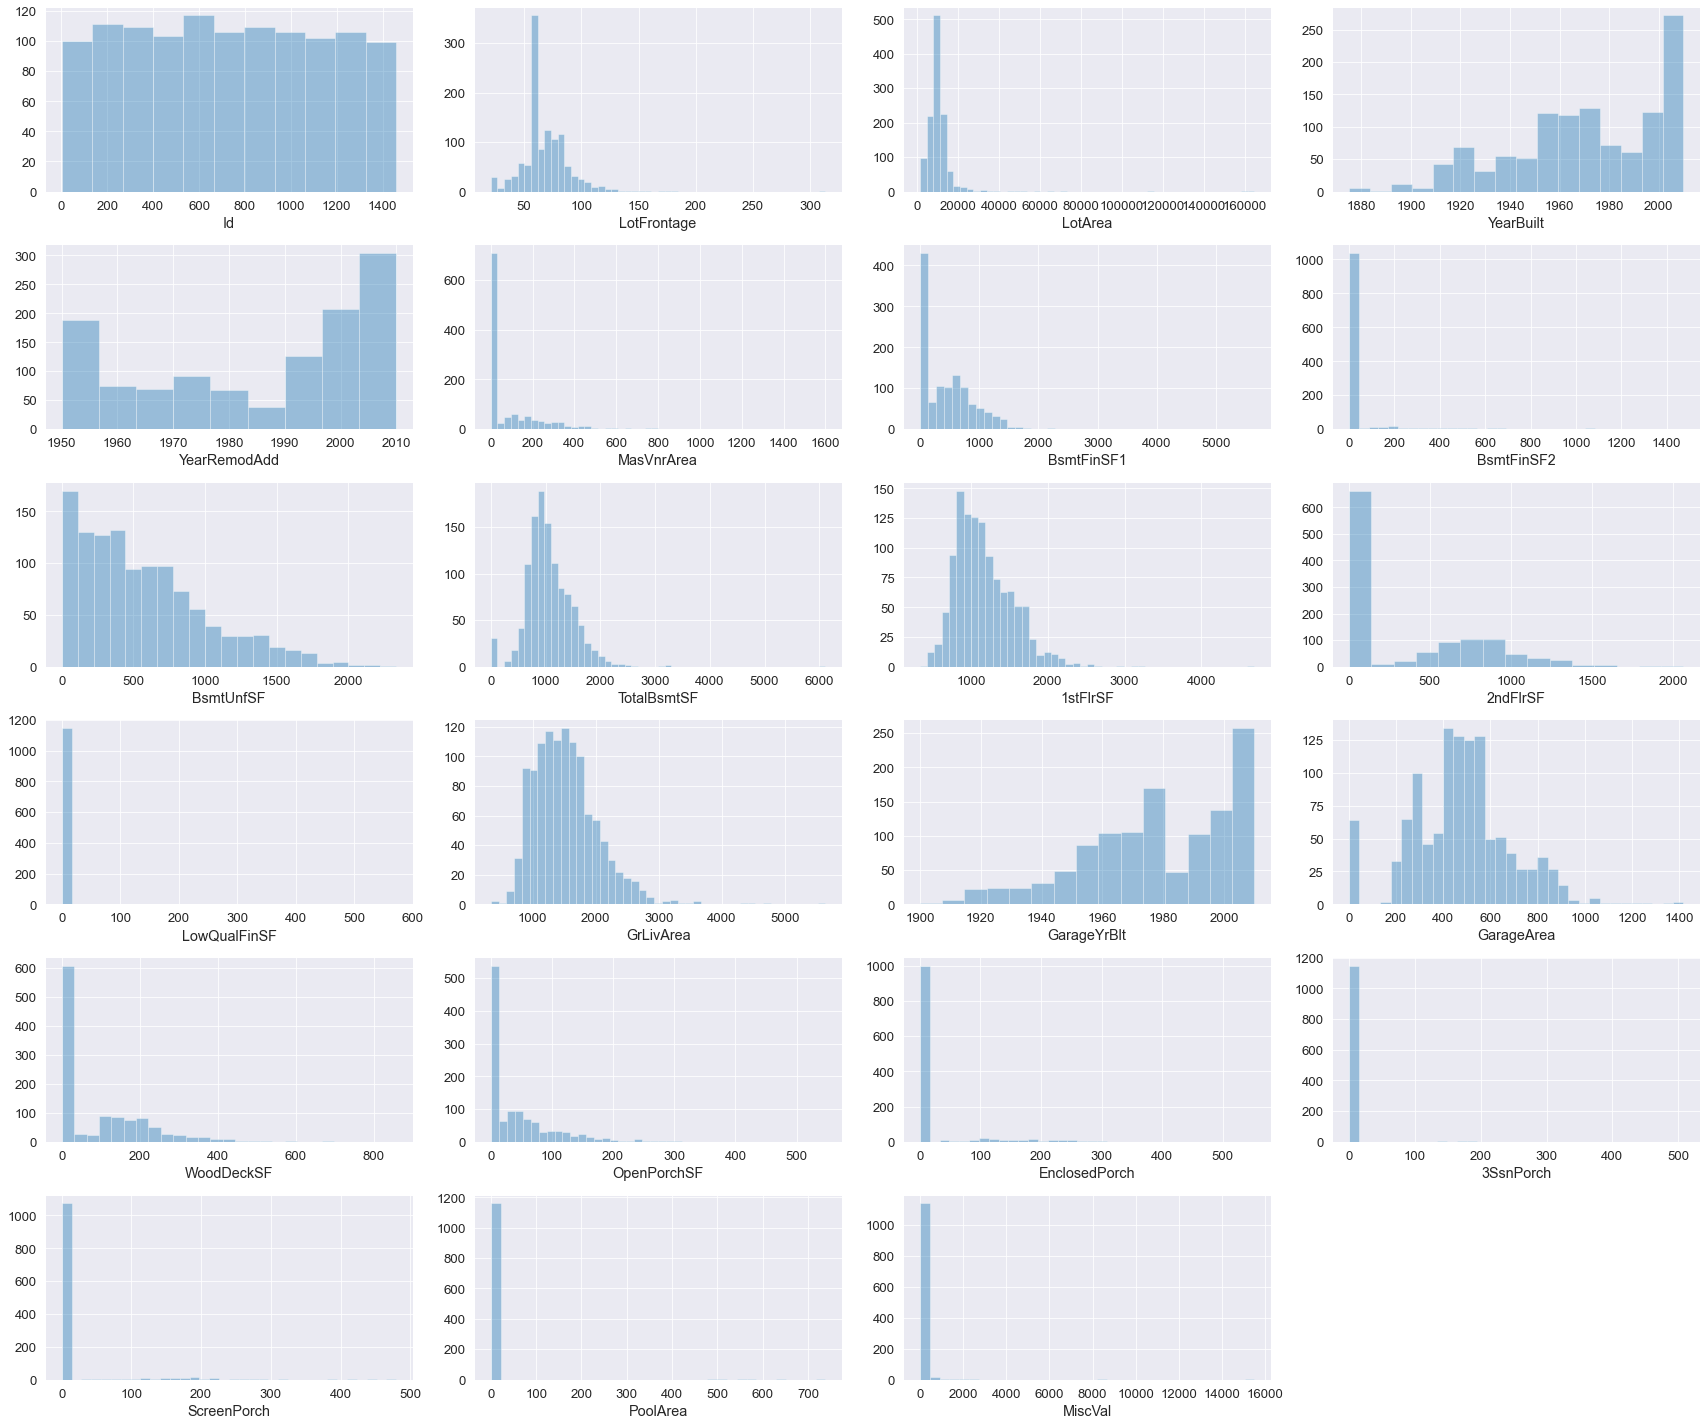

In [71]:
# Numeric features: continuous variables
sns.set_style('darkgrid')
fig = plt.figure(figsize=(24,20))
for index, col in enumerate(cont):
    plt.subplot(6,4,index+1)
    sns.distplot(df.loc[:,col].dropna(),kde=False)
fig.tight_layout(pad=1.0)
sns.set_context('paper',font_scale=1.5)

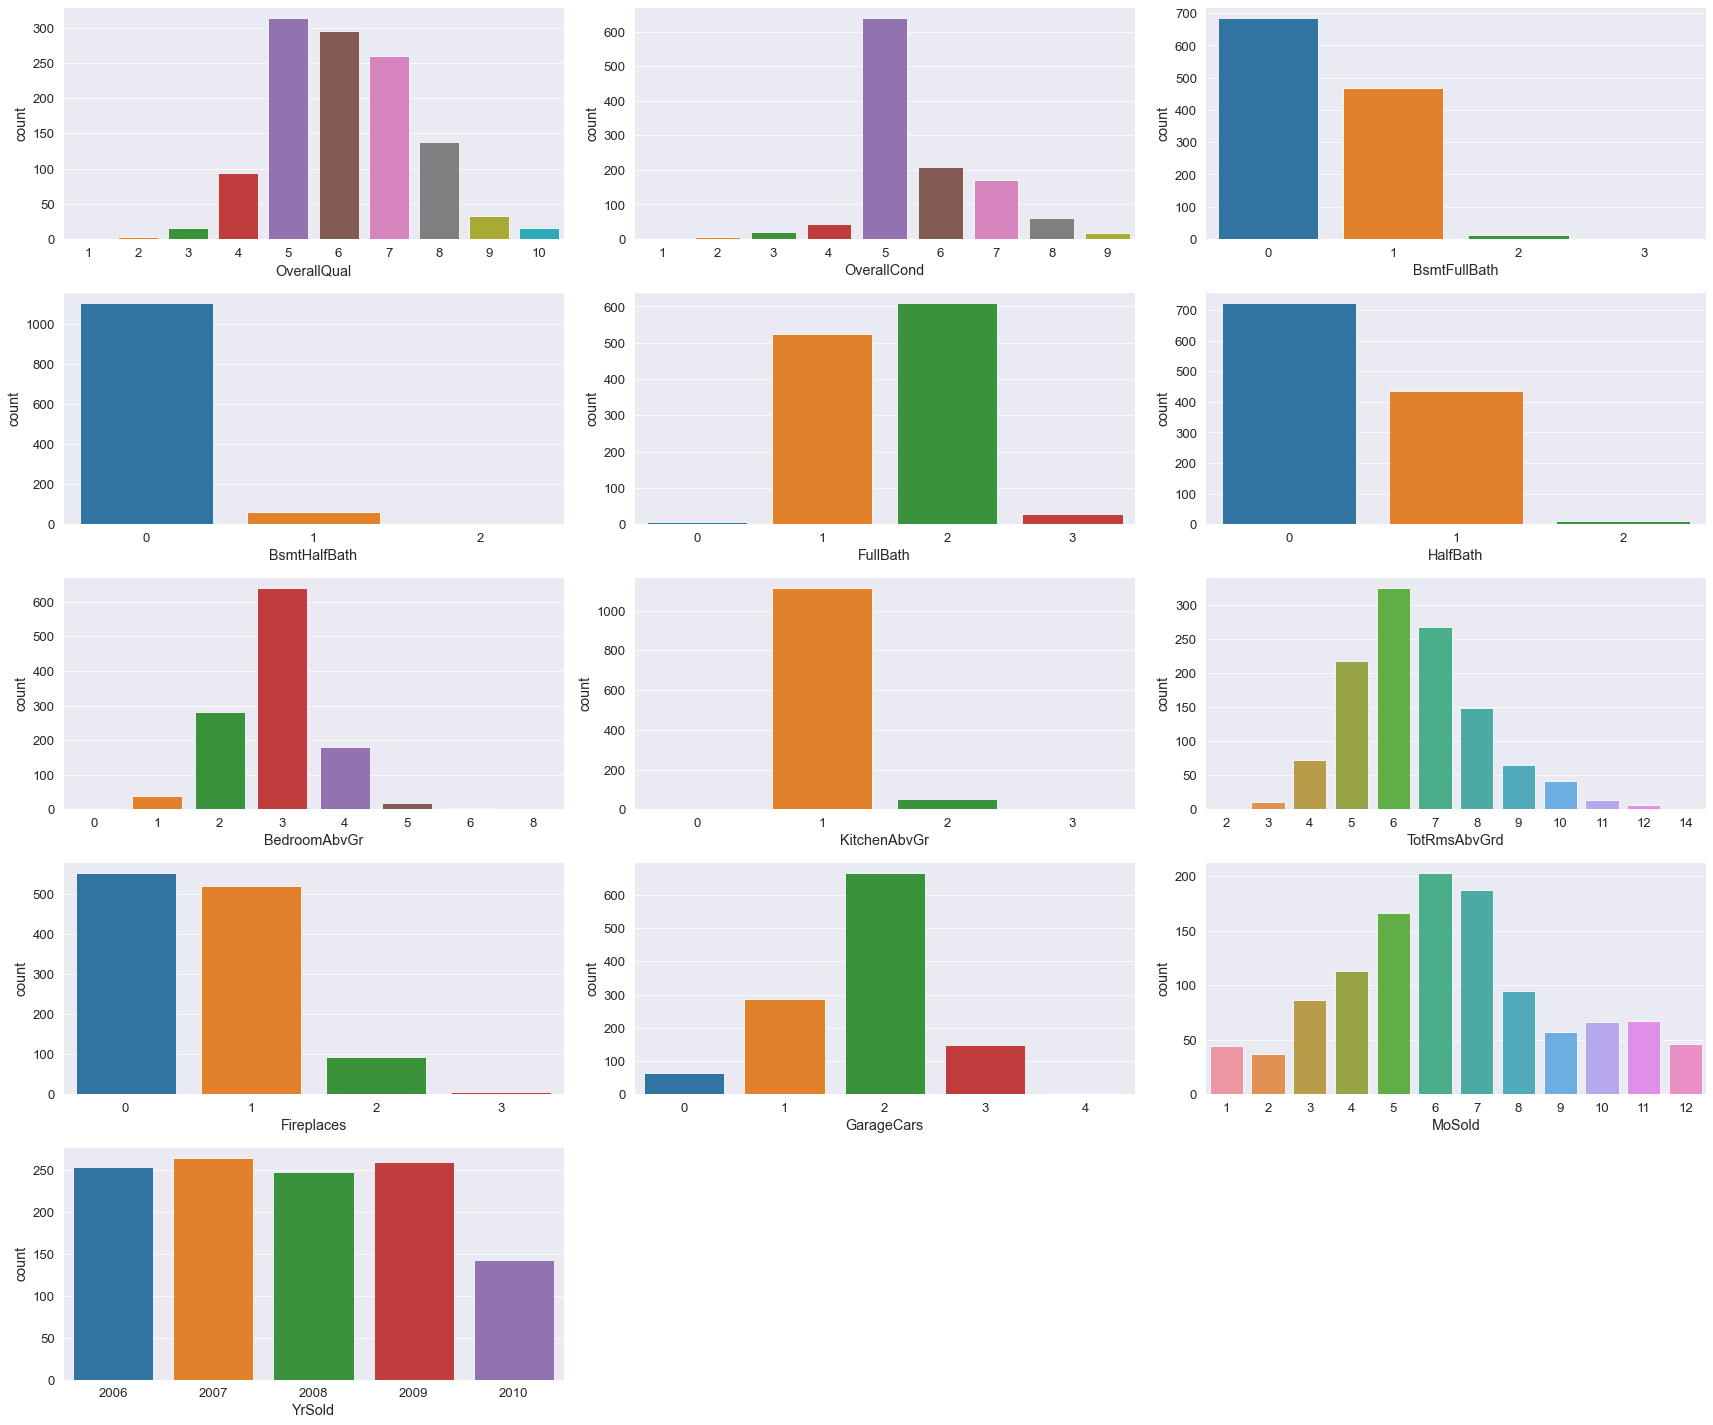

In [72]:
#Numeric features: discrete variables
sns.set_context('paper',font_scale=1.5)
fig = plt.figure(figsize=(24,20))
for index,col in enumerate(disc):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=df)
fig.tight_layout(pad=1.0)

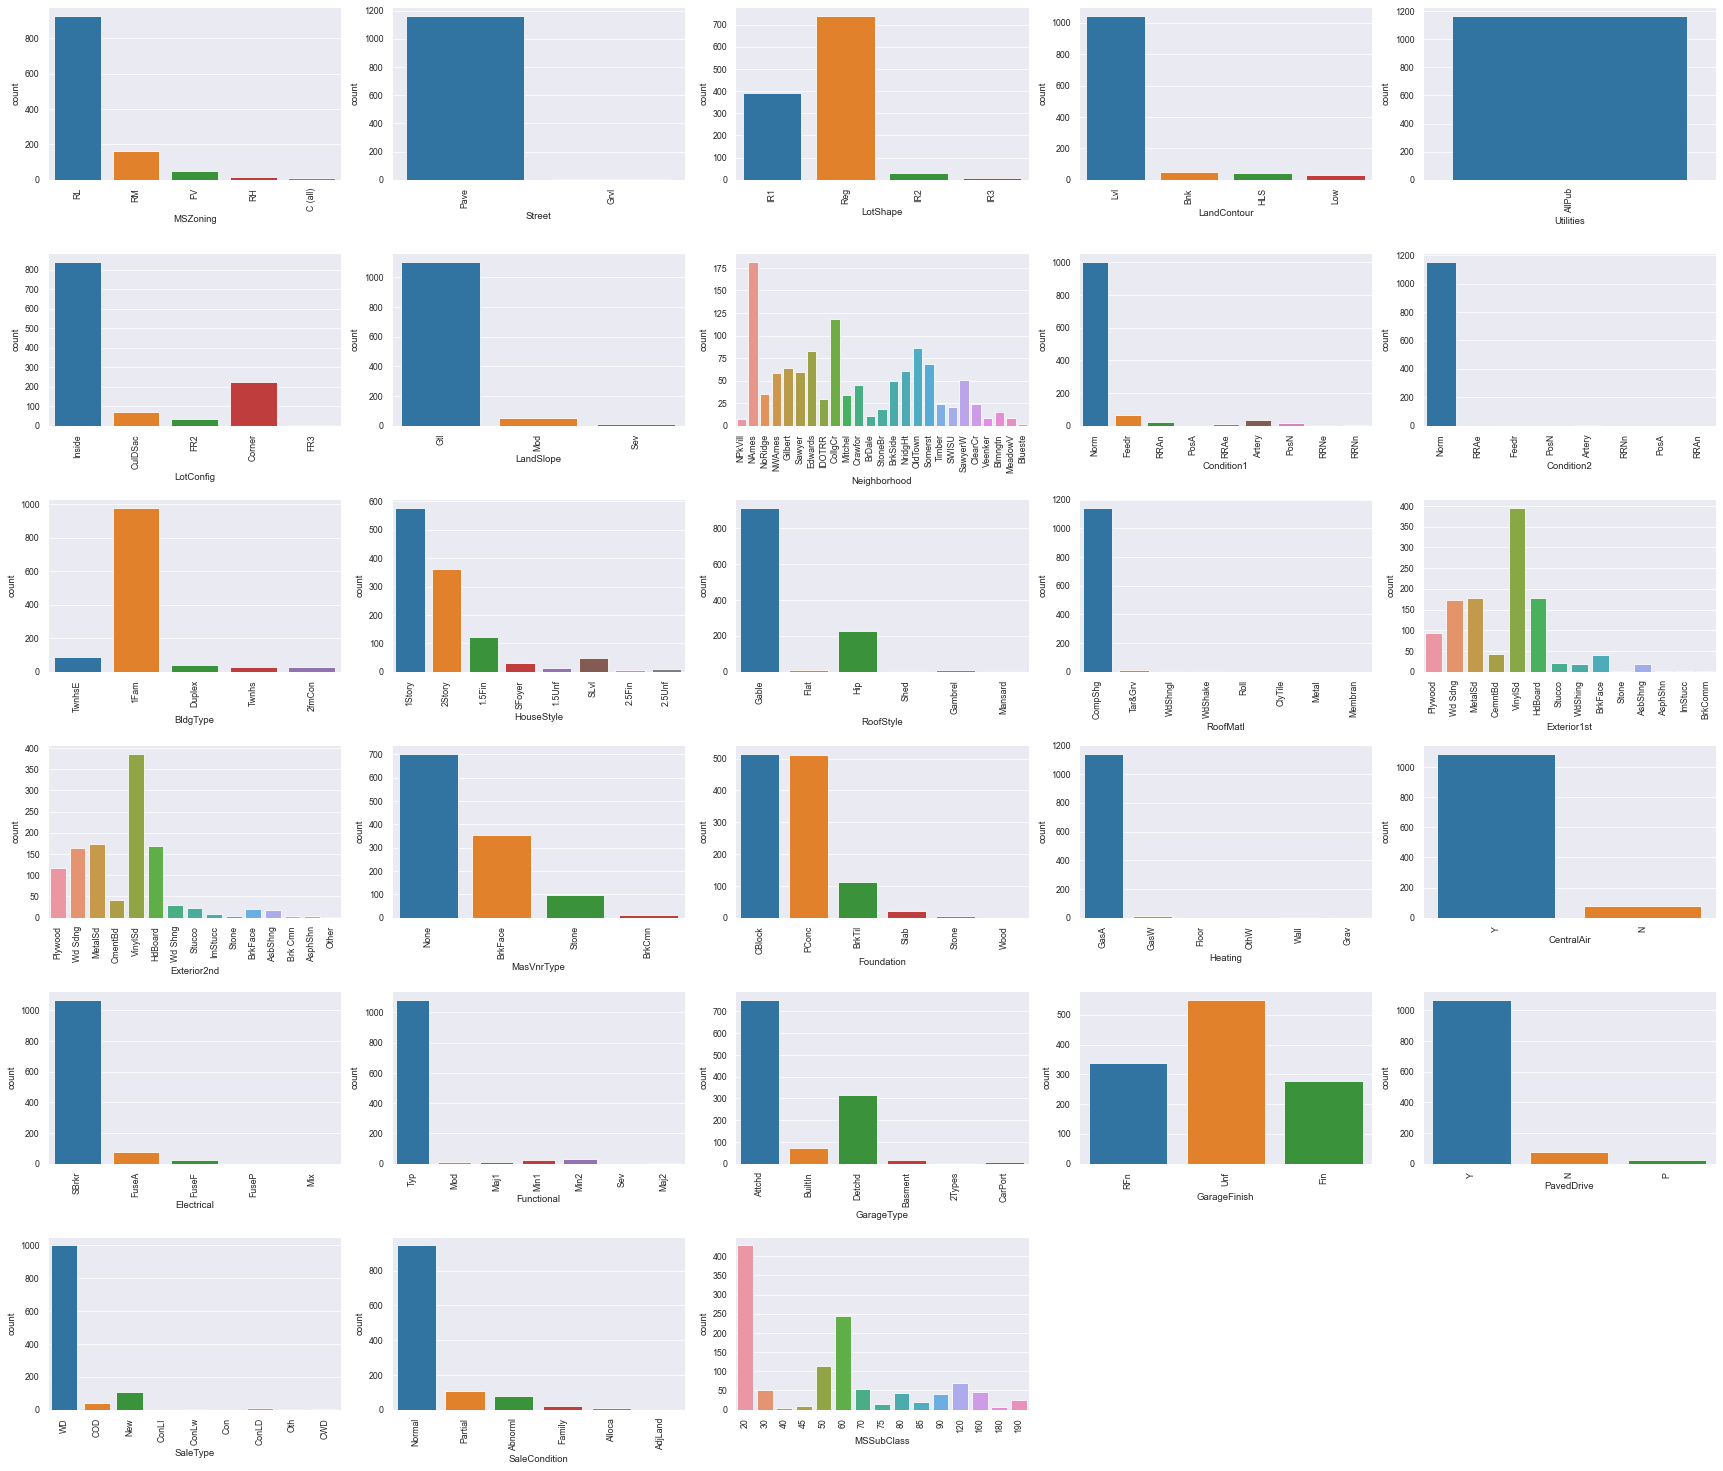

In [73]:
#Categorical features: nominal variables
sns.set_context('paper',font_scale=1)
fig = plt.figure(figsize=(24,30))
for index,col in enumerate(nomi):
    plt.subplot(9,5,index+1)
    sns.countplot(x=col, data=df[nomi])
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

Bi-variate EDA: features vs targe
Numeric features: continuous variables

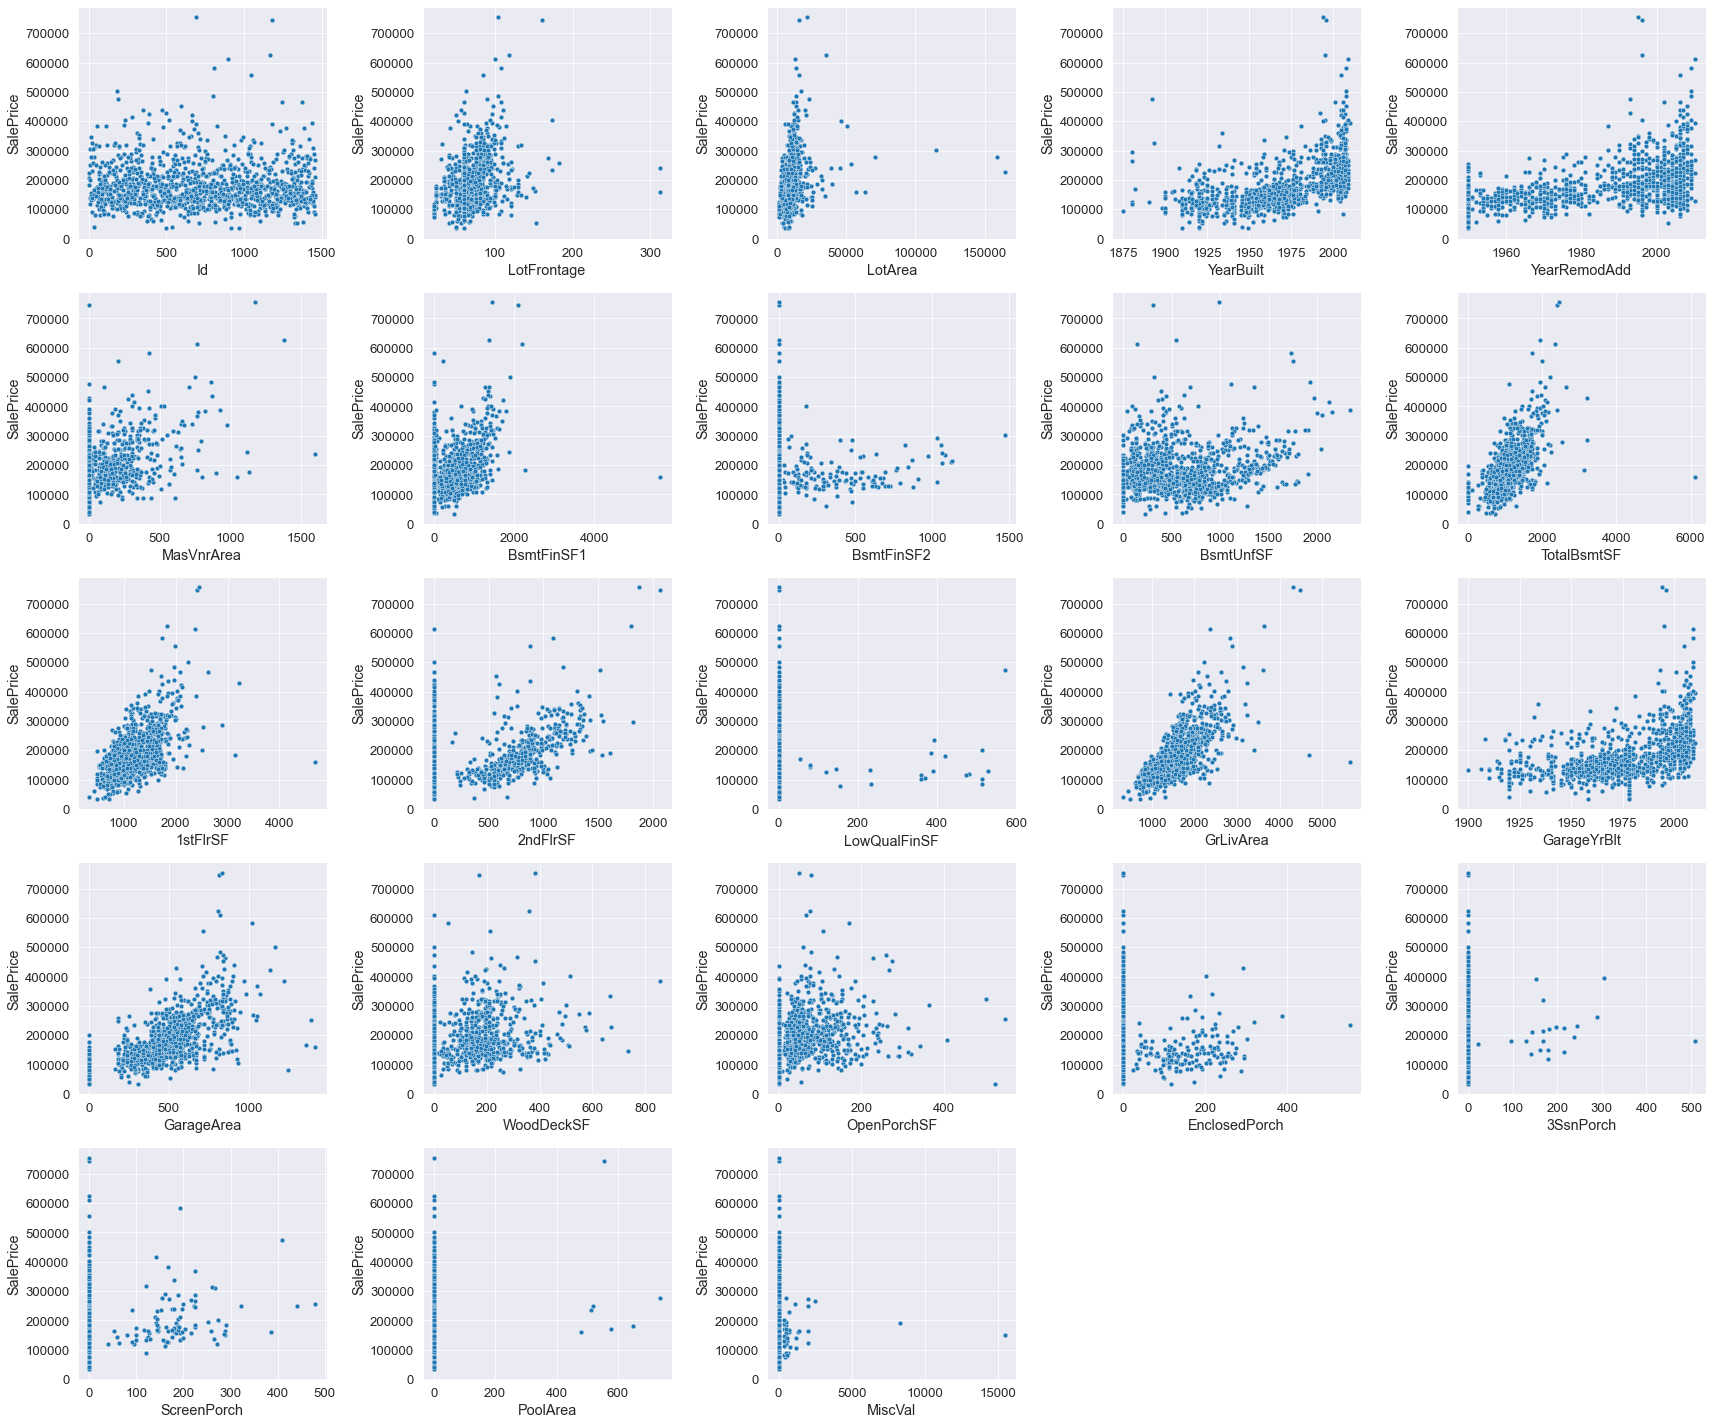

In [74]:
# Numerical continuious columns vs the SalePrice
sns.set_context('paper',font_scale=1.5)
fig = plt.figure(figsize=(24,20))
for index in range(len(cont)):
    plt.subplot(5,5,index+1)
    sns.scatterplot(x=df[cont].iloc[:,index],
                    y=df['SalePrice'],
                    data=df)
fig.tight_layout(pad=1.0)

Numeric features: discrete features

In [75]:
disc_S = disc + ['SalePrice']

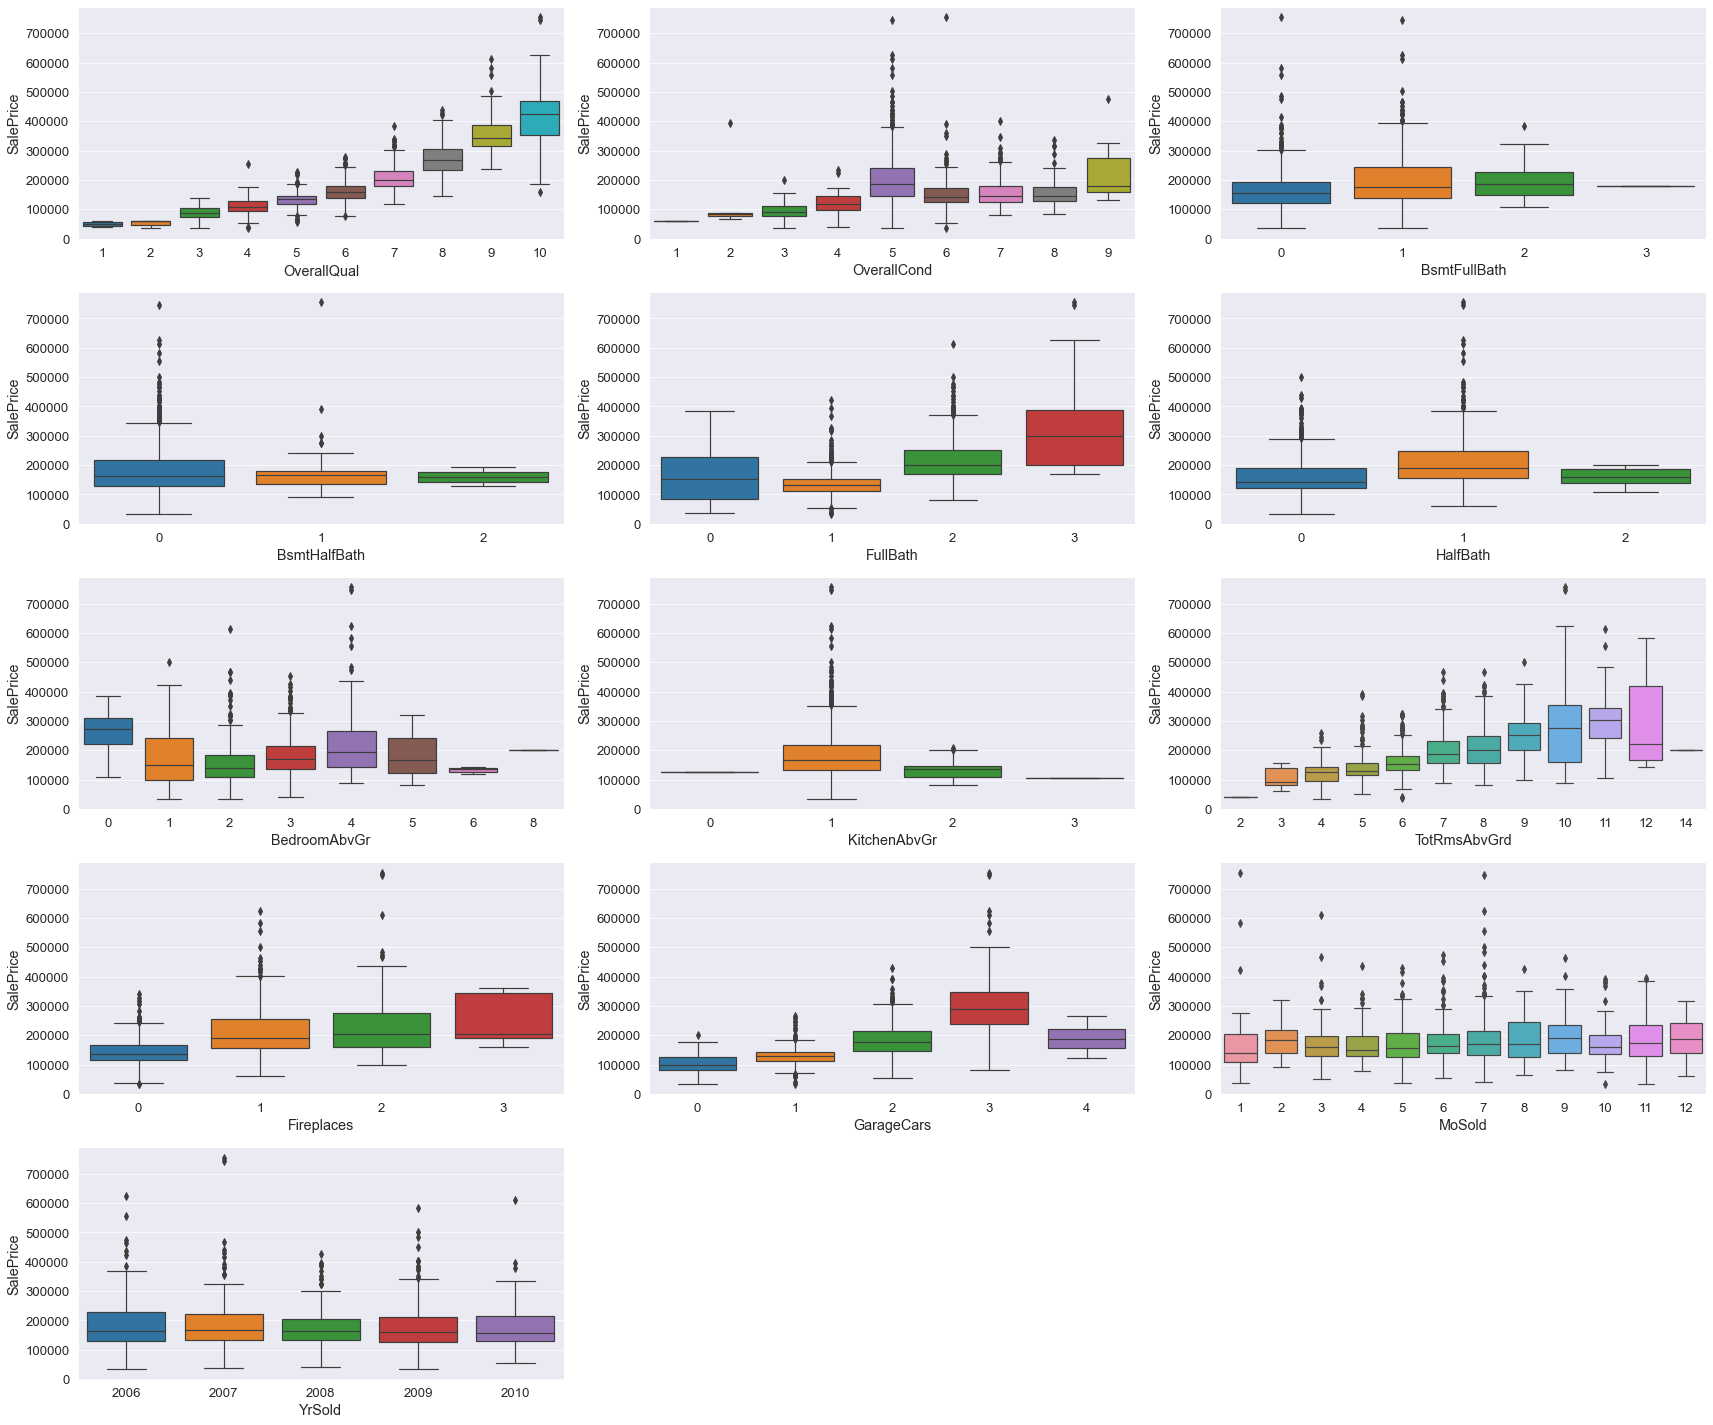

In [76]:
sns.set_context('paper',font_scale=1.5)
fig = plt.figure(figsize=(24,20))
for index,col in enumerate(disc):
    plt.subplot(5,3,index+1)
    sns.boxplot(x=col,y='SalePrice',data=df[disc_S])
    #plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

In [77]:
#Categorical features: nominal variables
nomi_S = nomi + ['SalePrice']

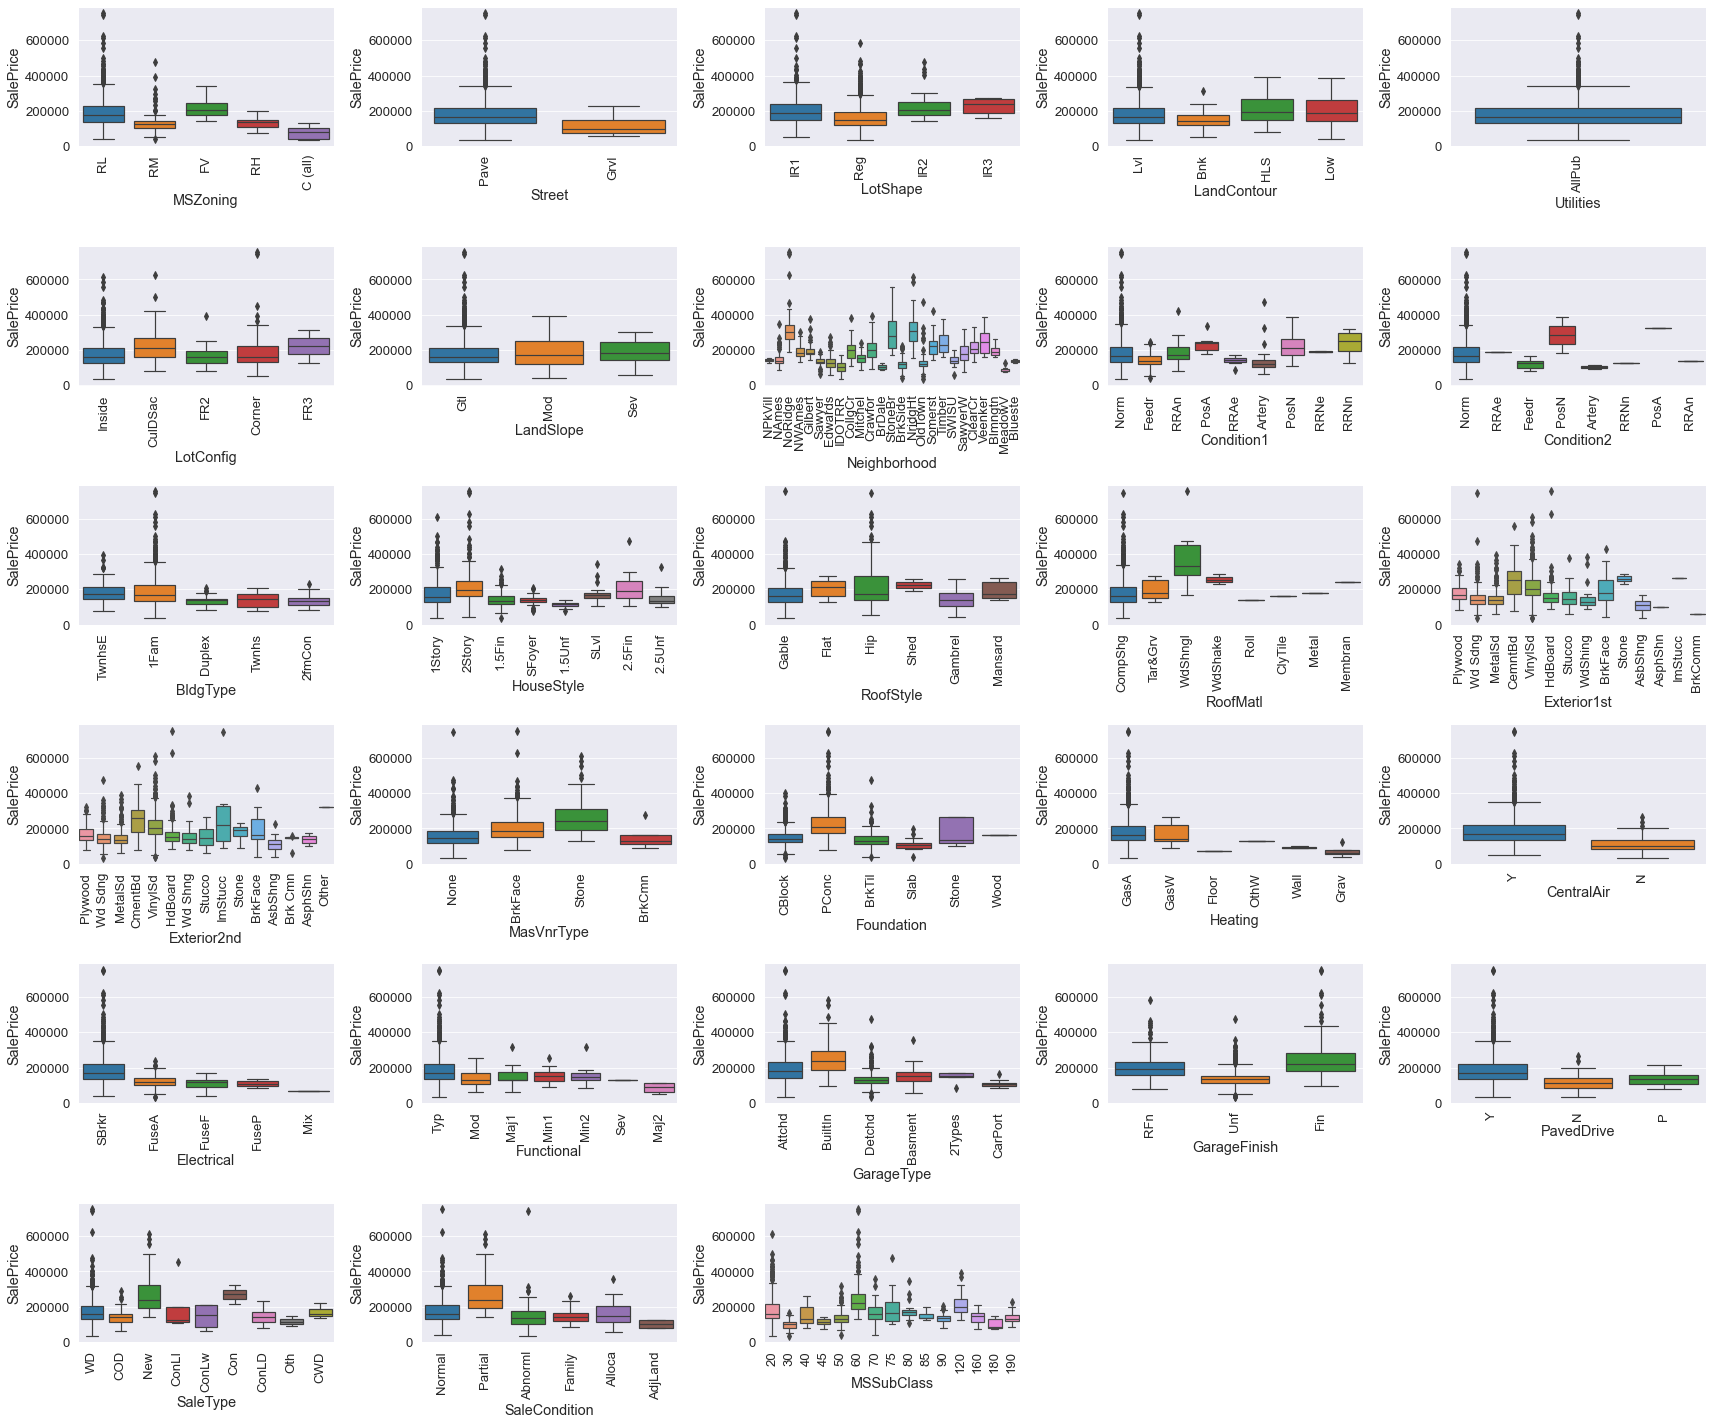

In [78]:
sns.set_context('paper',font_scale=1.5)
fig = plt.figure(figsize=(24,20))
for index,col in enumerate(nomi):
    plt.subplot(6,5,index+1)
    sns.boxplot(x=col,y='SalePrice',data=df[nomi_S])
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

Categorical features: ordinal variables

In [79]:
ordi_S = ordi + ['SalePrice']

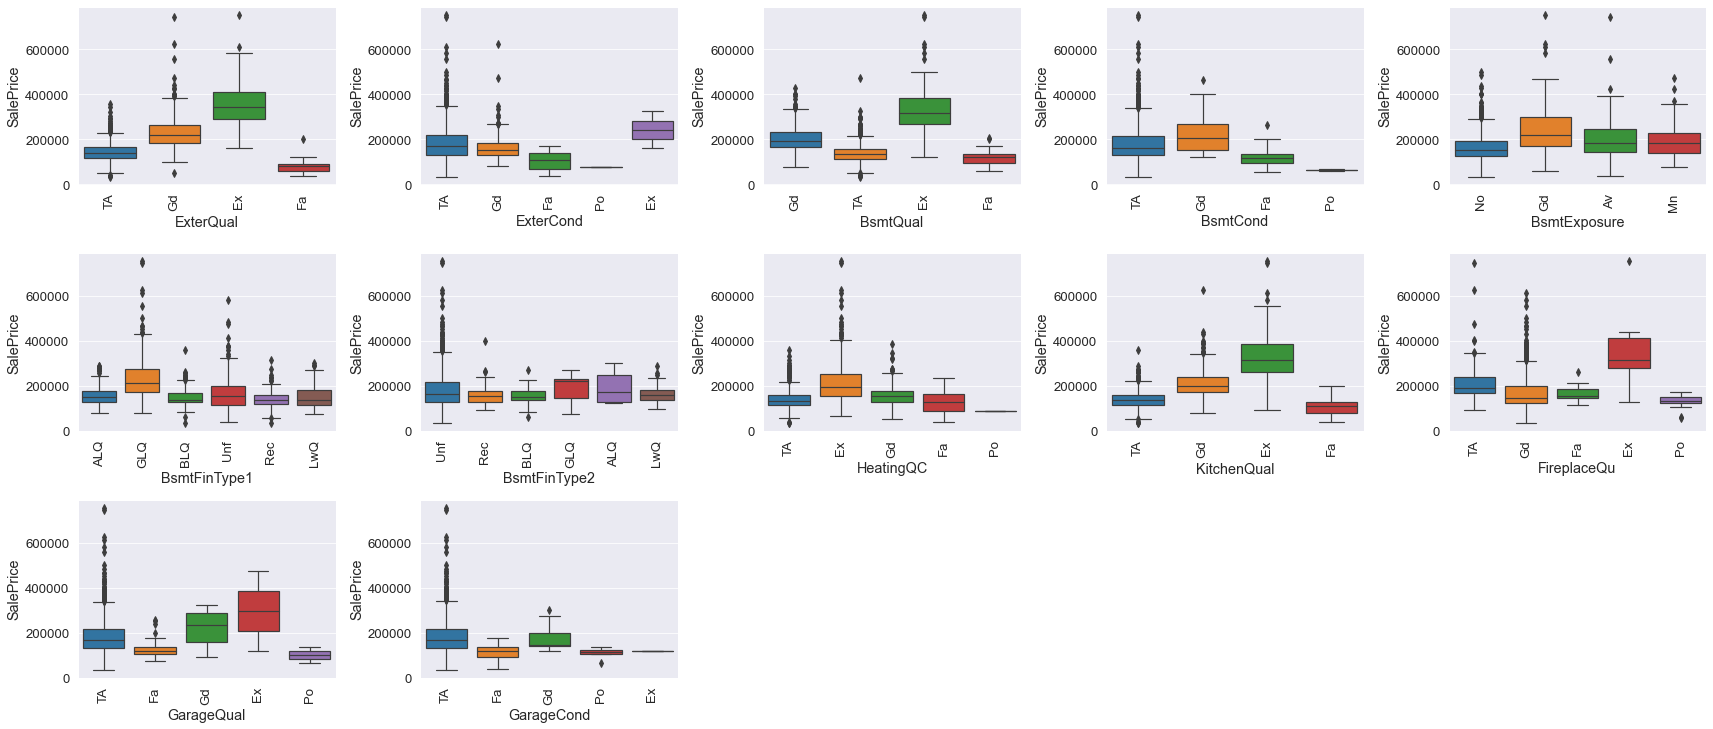

In [80]:
sns.set_context('paper',font_scale=1.5)
fig = plt.figure(figsize=(24,20))
for index,col in enumerate(ordi):
    plt.subplot(6,5,index+1)
    sns.boxplot(x=col,y='SalePrice',data=df[ordi_S])
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

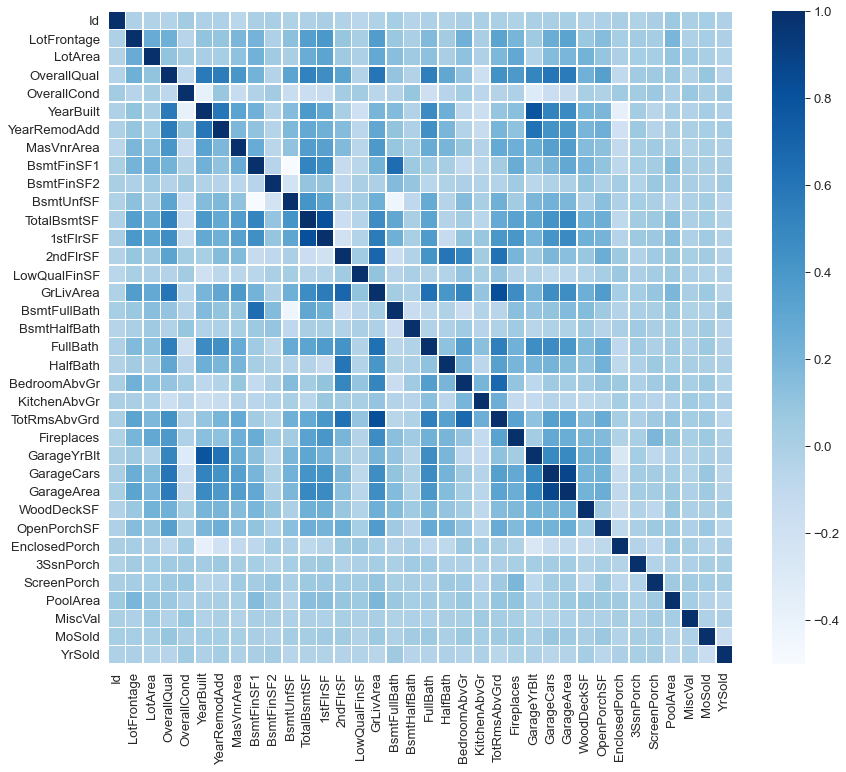

In [81]:
#Correlation matrix
# Checking for multicollinearity within numerical columns
# (keep in mind correlation and causation are different things)

plt.figure(figsize=(14,12))
num_correlation = df[num_cols].corr()
sns.set_style('darkgrid')
sns.heatmap(num_correlation, 
            #mask = num_correlation < 0.8,
            linewidth=0.5,
            cmap='Blues');

In [82]:
corrnum = num_correlation.abs().unstack().drop_duplicates().sort_values(ascending=False)
corrnum[(corrnum< 1) & (corrnum> 0.8)]

GarageCars   GarageArea      0.877542
GrLivArea    TotRmsAbvGrd    0.821845
TotalBsmtSF  1stFlrSF        0.813357
dtype: float64

In [83]:
# Investigating correlation between numerical features and the target (SalePrice)
num_cols_S = num_cols + ['SalePrice']
correlation = df[num_cols_S].corr()
corr = correlation[['SalePrice']].sort_values(['SalePrice'],ascending=False)
corr[0:10]

SalePrice
SalePrice      1.000000
OverallQual    0.789185
GrLivArea      0.707300
GarageCars     0.628329
GarageArea     0.619000
TotalBsmtSF    0.595042
1stFlrSF       0.587642
FullBath       0.554988
TotRmsAbvGrd   0.528363
YearBuilt      0.514408

From the results of correlation matrix between numerical features and their correlation with the target features the following ones were removed:

In [84]:
df = df.drop(['Utilities', 'Street',], axis=1)

In [85]:
var_cat = df.select_dtypes(include=[object])
var_cat.head()

MSZoning LotShape LandContour LotConfig LandSlope Neighborhood Condition1  \
0       RL      IR1         Lvl    Inside       Gtl      NPkVill       Norm   
1       RL      IR1         Lvl    Inside       Mod        NAmes       Norm   
2       RL      IR1         Lvl   CulDSac       Gtl      NoRidge       Norm   
3       RL      IR1         Lvl    Inside       Gtl       NWAmes       Norm   
4       RL      IR1         Lvl       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  ... KitchenQual Functional FireplaceQu  \
0       Norm   TwnhsE     1Story  ...          TA        Typ          TA   
1       Norm     1Fam     1Story  ...          Gd        Typ          TA   
2       Norm     1Fam     2Story  ...          TA        Typ          TA   
3       Norm     1Fam     1Story  ...          TA        Typ          TA   
4       Norm     1Fam     1Story  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          Unf         TA         TA          Y       WD   
2     Attchd          Unf         TA         TA          Y       WD   
3     Attchd          RFn         TA         TA          Y      COD   
4     Attchd          Fin         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3        Normal  
4        Normal  

[5 rows x 37 columns]

In [86]:
var_cat = var_cat.columns.tolist() #Changing categorical data into numericat
var_cat = ['LotFrontage','LotShape','Exterior1st','Exterior2nd','MasVnrType','BsmtExposure','BsmtFinType1']


var_cat
['LotFrontage','LotShape','Exterior1st','Exterior2nd','MasVnrType','BsmtExposure','BsmtFinType1']

['LotFrontage',
 'LotShape',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtExposure',
 'BsmtFinType1']

In [87]:
from sklearn.preprocessing import LabelEncoder #Converting catagorical data into numerical with the help of Label Encoder
LE=LabelEncoder()
df["MSZoning"]=LE.fit_transform(df["MSZoning"])
df["SaleCondition"]=LE.fit_transform(df["SaleCondition"])
df["SaleType"]=LE.fit_transform(df["SaleType"])
df["PavedDrive"]=LE.fit_transform(df["PavedDrive"])
df["GarageCond"]=LE.fit_transform(df["GarageCond"])
df["GarageQual"]=LE.fit_transform(df["GarageQual"])
df["GarageFinish"]=LE.fit_transform(df["GarageFinish"])
df["GarageType"]=LE.fit_transform(df["GarageType"])
df["FireplaceQu"]=LE.fit_transform(df["FireplaceQu"])
df["Functional"]=LE.fit_transform(df["Functional"])
df["KitchenQual"]=LE.fit_transform(df["KitchenQual"])
df["Condition2"]=LE.fit_transform(df["Condition2"])
df["HeatingQC"]=LE.fit_transform(df["HeatingQC"])
df["CentralAir"]=LE.fit_transform(df["CentralAir"])
df["Electrical"]=LE.fit_transform(df["Electrical"])
df["BsmtFinType2"]=LE.fit_transform(df["BsmtFinType2"])
df["BsmtFinType1"]=LE.fit_transform(df["BsmtFinType1"])
df["ExterCond"]=LE.fit_transform(df["ExterCond"])
df["Foundation"]=LE.fit_transform(df["Foundation"])
df["BsmtQual"]=LE.fit_transform(df["BsmtQual"])
df["BsmtCond"]=LE.fit_transform(df["BsmtCond"])
df["LandContour"]=LE.fit_transform(df["LandContour"])
df["RoofMatl"]=LE.fit_transform(df["RoofMatl"])
df["LotConfig"]=LE.fit_transform(df["LotConfig"])
df["LandSlope"]=LE.fit_transform(df["LandSlope"])
df["Neighborhood"]=LE.fit_transform(df["Neighborhood"])
df["Condition1"]=LE.fit_transform(df["Condition1"])
df["BldgType"]=LE.fit_transform(df["BldgType"])
df["HouseStyle"]=LE.fit_transform(df["HouseStyle"])
df["RoofStyle"]=LE.fit_transform(df["RoofStyle"])

df["ExterQual"]=LE.fit_transform(df["ExterQual"])
df["LotShape"]=LE.fit_transform(df["LotShape"])

df["LotFrontage"]=LE.fit_transform(df["LotFrontage"])
df["Exterior1st"]=LE.fit_transform(df["Exterior1st"])
df["Exterior2nd"]=LE.fit_transform(df["Exterior2nd"])
df["MasVnrType"]=LE.fit_transform(df["MasVnrType"])
df["BsmtExposure"]=LE.fit_transform(df["BsmtExposure"])
df["Heating"]=LE.fit_transform(df["Heating"])

Id                 AxesSubplot(0.125,0.787927;0.0596154x0.0920732)
MSSubClass       AxesSubplot(0.196538,0.787927;0.0596154x0.0920...
MSZoning         AxesSubplot(0.268077,0.787927;0.0596154x0.0920...
LotFrontage      AxesSubplot(0.339615,0.787927;0.0596154x0.0920...
LotArea          AxesSubplot(0.411154,0.787927;0.0596154x0.0920...
LotShape         AxesSubplot(0.482692,0.787927;0.0596154x0.0920...
LandContour      AxesSubplot(0.554231,0.787927;0.0596154x0.0920...
LotConfig        AxesSubplot(0.625769,0.787927;0.0596154x0.0920...
LandSlope        AxesSubplot(0.697308,0.787927;0.0596154x0.0920...
Neighborhood     AxesSubplot(0.768846,0.787927;0.0596154x0.0920...
Condition1       AxesSubplot(0.840385,0.787927;0.0596154x0.0920...
Condition2         AxesSubplot(0.125,0.677439;0.0596154x0.0920732)
BldgType         AxesSubplot(0.196538,0.677439;0.0596154x0.0920...
HouseStyle       AxesSubplot(0.268077,0.677439;0.0596154x0.0920...
OverallQual      AxesSubplot(0.339615,0.677439;0.0596154x0.092

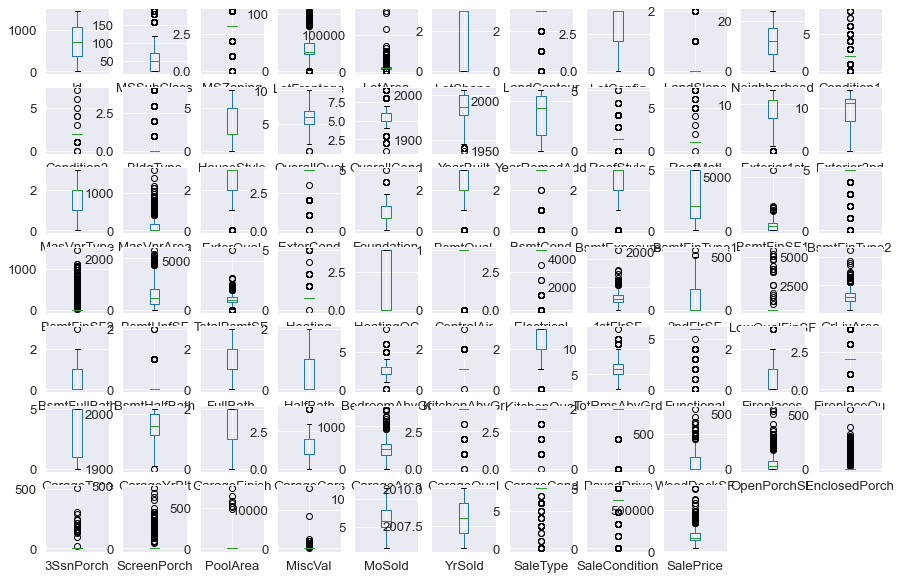

In [88]:
#Plotting boxplots to check outlier
df.plot(kind='box',subplots=True, layout=(7,11), figsize= (15,10))

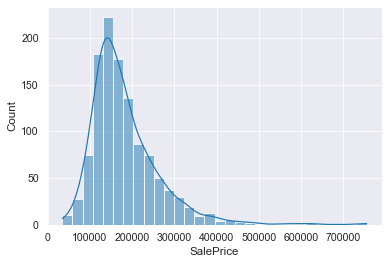

In [89]:
#Removing outliers from the target feature

sns.set_context('paper',font_scale=1.2)
sns.set_style('darkgrid')
sns.histplot(x='SalePrice',data=df,bins=30,kde=True)
plt.show()

In [90]:
df['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [91]:
df[df['SalePrice'] > 500000]

Id  MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
141  1183          60         3          101    15623         0            3   
241   899          20         3           70    12919         0            3   
300  1047          60         3           55    16056         0            3   
423   804          60         3           77    13891         3            3   
691   692          60         3           74    21535         0            3   
839  1170          60         3           86    35760         0            3   
914   179          20         3           33    17423         0            3   

     LotConfig  LandSlope  Neighborhood  ...  EnclosedPorch  3SsnPorch  \
141          0          0            15  ...              0          0   
241          4          0            16  ...              0          0   
300          4          0            22  ...              0          0   
423          4          0            16  ...              0          0   
691          0          0            15  ...              0          0   
839          1          0            15  ...              0          0   
914          1          0            22  ...              0          0   

     ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
141            0       555        0       7    2007         8              0   
241            0         0        0       3    2010         6              5   
300            0         0        0       7    2006         6              5   
423          192         0        0       1    2009         6              5   
691            0         0        0       1    2007         8              4   
839            0         0        0       7    2006         8              4   
914            0         0        0       7    2009         6              5   

     SalePrice  
141     745000  
241     611657  
300     556581  
423     582933  
691     755000  
839     625000  
914     501837  

[7 rows x 75 columns]

In [92]:
df = df.drop(df[df['SalePrice']>500000].index)

In [93]:
df.skew() # Checking Skewness

Id                0.031489
MSSubClass        1.418246
MSZoning         -1.791805
LotFrontage       0.719114
LotArea          10.775559
LotShape         -0.617606
LandContour      -3.113927
LotConfig        -1.129022
LandSlope         4.796367
Neighborhood      0.051145
Condition1        2.998648
Condition2       11.479618
BldgType          2.308228
HouseStyle        0.293063
OverallQual       0.135931
OverallCond       0.573776
YearBuilt        -0.572112
YearRemodAdd     -0.487963
RoofStyle         1.529701
RoofMatl          7.736217
Exterior1st      -0.615024
Exterior2nd      -0.597720
MasVnrType       -0.117419
MasVnrArea        2.711859
ExterQual        -1.808153
ExterCond        -2.518563
Foundation        0.008925
BsmtQual         -1.359083
BsmtCond         -3.281105
BsmtExposure     -1.185662
BsmtFinType1     -0.073618
BsmtFinSF1        1.885009
BsmtFinType2     -3.602675
BsmtFinSF2        4.350954
BsmtUnfSF         0.905044
TotalBsmtSF       1.781031
Heating          10.072518
H

In [94]:
#Normalizing the distribution

df["SalePrice"] = np.log(df['SalePrice'])

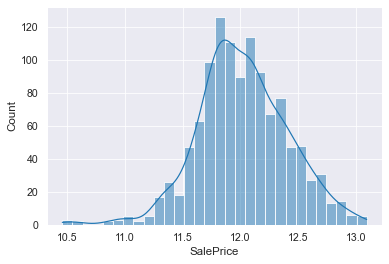

In [95]:
sns.set_context('paper',font_scale=1.2)
sns.set_style('darkgrid')
sns.histplot(x='SalePrice',data=df,bins=30,kde=True)
plt.show()

To begin, let’s split the dataset into training and test sets using 70/30 split; 70% of data will be used to train the model and the rest 30% to test the accuracy of the model. After partitioning and balancing, our data will make our model ready to be input of the machine learning models. We will train different models: Linear Regression,DecisionTreeRegressor,RandomForestRegressor,KNeighborsRegressor,AdaBoostRegressor and Lasso-Ridge. In this step, we will start modifying model parameters, perform feature engineering and balancing data strategies to improve the performance of the models. Try with more trees in the Random Forest model, include new variables, until beat the performance of our current best model.

In [96]:
x=df.drop("SalePrice",axis=1)
y=df["SalePrice"]

Scaling the data

In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.43232335,  1.5036095 , -0.02171117, ..., -0.60635895,
         0.32728929,  0.21004544],
       [ 0.39784071, -0.87617461, -0.02171117, ..., -0.60635895,
         0.32728929,  0.21004544],
       [ 0.16726886,  0.07573904, -0.02171117, ..., -0.60635895,
         0.32728929,  0.21004544],
       ...,
       [-1.26659984,  2.45552315, -0.02171117, ...,  0.89948649,
         0.32728929,  0.21004544],
       [-1.6628952 ,  0.31371745, -4.74796206, ...,  0.14656377,
         0.32728929,  0.21004544],
       [-0.2554462 ,  0.07573904, -0.02171117, ..., -1.35928167,
         0.32728929,  0.21004544]])

In [98]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [99]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("best accuracy is ",maxAccu,"on Random_state",maxRS)

best accuracy is  0.9544568924840015 on Random_state 160


In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=79)

In [101]:
LR.fit(x_train,y_train)

LinearRegression()

In [102]:
pred_test=LR.predict(x_test)

In [103]:
print(r2_score(y_test,pred_test))

0.9507702500247076


In [104]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [105]:
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [106]:
knn.fit(x_train,y_train)
pred_test=knn.predict(x_test)
print(r2_score(y_test,pred_test))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.9126713504885084
Mean absolute error: 0.380227301983127
Mean squared error: 0.25219600104899503
Root mean squared error: 0.5021911996929008


In [107]:
rf=RandomForestRegressor(n_estimators=100,random_state=57)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(r2_score(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.9045656793886332
Mean absolute error: 0.0923018163096802
Mean squared error: 0.015016387202762752
Root mean squared error: 0.12254136935240585


In [108]:
dt.fit(x_train,y_train)
pred_test=dt.predict(x_test)
print(r2_score(y_test,pred_test))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.8631019653204512
Mean absolute error: 0.0923018163096802
Mean squared error: 0.015016387202762752
Root mean squared error: 0.12254136935240585


In [109]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(r2_score(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.9045656793886332
Mean absolute error: 0.0923018163096802
Mean squared error: 0.015016387202762752
Root mean squared error: 0.12254136935240585


In [110]:
from sklearn.linear_model import Lasso,Ridge
ls= Lasso(alpha=0.1)
#ls=Lasso(alpha=1.0)#default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.6622650364001088

In [111]:
ls.coef_

array([-0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.15788967,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.00169726, -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.04867751,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.00156339,  0.04077124,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [112]:
#ElasticNet is a combinations of both Lasso and Ridge
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.1)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.7729476273492963


array([-0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.12977633,
        0.        ,  0.01805613,  0.02498649,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.0164579 , -0.        , -0.        ,  0.00649093,  0.        ,
        0.00930172,  0.        , -0.        ,  0.07099485,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.01512403,  0.        ,
       -0.        ,  0.        , -0.01636444,  0.04288775,  0.01164897,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.  

Cross checking test data with Cross val score

In [113]:
from sklearn.model_selection import cross_val_score
enr=ElasticNet(alpha=0.1)
score=cross_val_score(enr, x,y,cv=5)
r2=r2_score(y_test,pred)
r2

0.9045656793886332

In [114]:
from sklearn.model_selection import cross_val_score
ls=Lasso(alpha=0.0001)
score=cross_val_score(ls, x,y,cv=5)
r2=r2_score(y_test,pred)
r2

0.9045656793886332

In [115]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
score=cross_val_score(rf, x,y,cv=5)
r2=r2_score(y_test,pred)
r2

0.9045656793886332

In [116]:
from sklearn.model_selection import cross_val_score
LR=LinearRegression()
score=cross_val_score(LR, x,y,cv=5)
r2=r2_score(y_test,pred)
r2

0.9045656793886332

In [117]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor()
score=cross_val_score(knn, x,y,cv=5)
r2=r2_score(y_test,pred)
r2

0.9045656793886332

In [118]:
from sklearn.model_selection import cross_val_score
dt = DecisionTreeRegressor()
score=cross_val_score(dt, x,y,cv=5)
r2=r2_score(y_test,pred)
r2

0.9045656793886332

In [119]:
from sklearn.model_selection import cross_val_score
ad=AdaBoostRegressor()
score=cross_val_score(ad, x,y,cv=5)
r2=r2_score(y_test,pred)
r2

0.9045656793886332

Ater applying crossvalidation Minimum difference found in RandomForestRegressor so this is our best model

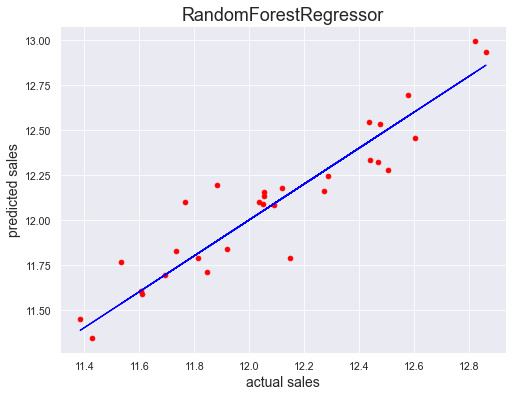

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('actual sales',fontsize=14)
plt.ylabel('predicted sales',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

Hyper tunning the dataset with the help of GridSearchCV

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
grid=GridSearchCV(rf,parameters)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [122]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("R2 Score:",rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print("corss val score:",rfc*100)

R2 Score: 90.5644658425906
corss val score: 85.57612778962236


In [123]:
import pickle
filename="housing_price.pkl"
pickle.dump(rf,open(filename,'wb'))


Uploading test data

In [124]:
df2=pd.read_csv("housing_price_test.csv")
df2

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
5     650         180       RM         21.0     1936   Pave   NaN      Reg   
6    1453         180       RM         35.0     3675   Pave   NaN      Reg   
7     152          20       RL        107.0    13891   Pave   NaN      Reg   
8     427          80       RL          NaN    12800   Pave   NaN      Reg   
9     776         120       RM         32.0     4500   Pave   NaN      Reg   
10     30          30       RM         60.0     6324   Pave   NaN      IR1   
11   1425          20       RL          NaN     9503   Pave   NaN      Reg   
12    423          20       RL        100.0    21750   Pave   NaN      Reg   
13   1185          20       RL         50.0    35133   Grvl   NaN      Reg   
14    775          20       RL        110.0    14226   Pave   NaN      Reg   
15    391          50       RL         50.0     8405   Pave  Grvl      Reg   
16   1408          20       RL          NaN     8780   Pave   NaN      IR1   
17    513          20       RL         70.0     9100   Pave   NaN      Reg   
18   1266         160       FV         35.0     3735   Pave   NaN      Reg   
19    173         160       RL         44.0     5306   Pave   NaN      IR1   
20   1150          70       RM         50.0     9000   Pave   NaN      Reg   
21    797          20       RL         71.0     8197   Pave   NaN      Reg   
22    137          20       RL          NaN    10355   Pave   NaN      IR1   
23    706         190       RM         70.0     5600   Pave   NaN      Reg   
24   1377          30       RL         52.0     6292   Pave   NaN      Reg   
25   1177          20       RL         37.0     6951   Pave   NaN      IR1   
26   1456          60       RL         62.0     7917   Pave   NaN      Reg   
27    369          20       RL         78.0     7800   Pave   NaN      Reg   
28   1421          60       RL         90.0    11700   Pave   NaN      Reg   
29    999          30       RM         60.0     9786   Pave   NaN      Reg   
30   1217          90       RM         68.0     8930   Pave   NaN      Reg   
31    937          20       RL         67.0    10083   Pave   NaN      Reg   
32    769          20       RL         70.0     9100   Pave   NaN      Reg   
33    831          20       RL         80.0    11900   Pave   NaN      IR1   
34    678          30       RL         52.0     9022   Pave   NaN      Reg   
35    574          80       RL         76.0     9967   Pave   NaN      IR1   
36    921          60       RL         70.0     8462   Pave   NaN      IR1   
37   1292         160       RM         21.0     1680   Pave   NaN      Reg   
38   1277          60       RL          NaN    12936   Pave   NaN      IR1   
39    676         160       RL         24.0     2289   Pave   NaN      Reg   
40    108          20       RM         50.0     6000   Pave   NaN      Reg   
41    424          60       RL         80.0     9200   Pave   NaN      Reg   
42    823          60       RL          NaN    12394   Pave   NaN      IR1   
43   1455          20       FV         62.0     7500   Pave  Pave      Reg   
44    377          85       RL         57.0     8846   Pave   NaN      IR1   
45   1256          50       RM         52.0     6240   Pave   NaN      Reg   
46   1120          20       RL         70.0     7560   Pave   NaN      Reg   
47    265          30       RM         30.0     5232   Pave  Grvl      IR3   
48   1158         120       RL         34.0     5001   Pave   NaN      IR1   
49    725          20       RL         86.0    13286   Pave   NaN      IR1   
50   1378          50       R

In [125]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [126]:
df2.keys

<bound method NDFrame.keys of        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
5     650         180       RM         21.0     1936   Pave   NaN      Reg   
6    1453         180       RM         35.0     3675   Pave   NaN      Reg   
7     152          20       RL        107.0    13891   Pave   NaN      Reg   
8     427          80       RL          NaN    12800   Pave   NaN      Reg   
9     776         120       RM         32.0     4500   Pave   NaN      Reg   
10     30          30       RM         60.0     6324   Pave   NaN      IR1   
11   1425          20       RL    

In [127]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [128]:
df2.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [129]:
df2.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [130]:
df2.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [131]:
df2["GarageYrBlt"]=df2["GarageYrBlt"].fillna(np.mean(df2["GarageYrBlt"]))
df2["MasVnrArea"]=df2["MasVnrArea"].fillna(np.mean(df2["MasVnrArea"]))
df2["BsmtExposure"].fillna(df2["BsmtExposure"].mode()[0], inplace=True)
df2["BsmtFinType1"].fillna(df2["BsmtFinType1"].mode()[0], inplace=True)
df2["BsmtFinType2"].fillna(df2["BsmtFinType2"].mode()[0], inplace=True)
df2["GarageType"].fillna(df2["GarageType"].mode()[0], inplace=True)
df2["MasVnrType"].fillna(df2["MasVnrType"].mode()[0], inplace=True)
df2["GarageFinish"].fillna(df2["GarageFinish"].mode()[0], inplace=True)
df2["GarageQual"].fillna(df2["GarageQual"].mode()[0], inplace=True)
df2["GarageCond"].fillna(df2["GarageCond"].mode()[0], inplace=True)
df2["BsmtQual"].fillna(df2["BsmtQual"].mode()[0], inplace=True)
df2["BsmtCond"].fillna(df2["BsmtCond"].mode()[0], inplace=True)
df2["FireplaceQu"].fillna(df2["FireplaceQu"].mode()[0], inplace=True)
df2["LotFrontage"].fillna(df2["LotFrontage"].mode()[0], inplace=True)
df2["Electrical"].fillna(df2["Electrical"].mode()[0], inplace=True)

In [132]:
df2.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   292.000000     292.000000   292.000000   
mean    755.955479   57.414384    65.434932   10645.143836     6.078767   
std     442.565228   43.780649    20.110670   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    57.750000    7200.000000     5.000000   
50%     778.000000   50.000000    60.000000    9200.000000     6.000000   
75%    1152.250000   70.000000    76.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count   292.000000   292.000000    292.000000   292.000000   292.000000  ...   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521  ...   
std       1.063267    30.447016     20.105792   174.729023   429.559675  ...   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000  ...   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000  ...   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000  ...   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000  ...   

        GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  \
count   292.000000  292.000000   292.000000     292.000000  292.000000   
mean    457.458904   86.397260    47.061644      17.708904    2.489726   
std     210.785591  121.898836    65.865449      51.892906   30.247488   
min       0.000000    0.000000     0.000000       0.000000    0.000000   
25%     300.000000    0.000000     0.000000       0.000000    0.000000   
50%     467.500000    0.000000    28.500000       0.000000    0.000000   
75%     569.750000  149.250000    66.000000       0.000000    0.000000   
max    1052.000000  728.000000   418.000000     330.000000  407.000000   

       ScreenPorch  PoolArea      MiscVal      MoSold       YrSold  
count   292.000000     292.0   292.000000  292.000000   292.000000  
mean     15.099315       0.0    28.184932    6.232877  2007.859589  
std      58.483473       0.0   224.036218    2.774556     1.322867  
min       0.000000       0.0     0.000000    1.000000  2006.000000  
25%       0.000000       0.0     0.000000    4.000000  2007.000000  
50%       0.000000       0.0     0.000000    6.000000  2008.000000  
75%       0.000000       0.0     0.000000    8.000000  2009.000000  
max     396.000000       0.0  3500.000000   12.000000  2010.000000  

[8 rows x 37 columns]

In [133]:
# A huge mix of categorical (nominal and ordinal) with numerical (discrete and continuos) features.
# We will split them and apply some EDA seperately
from sklearn.compose import make_column_selector as selector
# All numerical features
num_cols = selector(dtype_exclude=['object','category'])
num_cols = num_cols(df2)
num_cols.remove('MSSubClass')

# Numerical features: Discrete (disc)
disc = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
# Numerical features: Continuous
cont = []
for i in num_cols:
    if i not in disc:
        cont.append(i)

In [134]:
# All categorical features
cat_cols = selector(dtype_include=['object','category'])
cat_cols = cat_cols(df2)
cat_cols = cat_cols + ['MSSubClass']
# Ordinal 
ordi = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',]

# Nominal
nomi = []
for i in cat_cols:
    if i not in ordi:
        nomi.append(i)

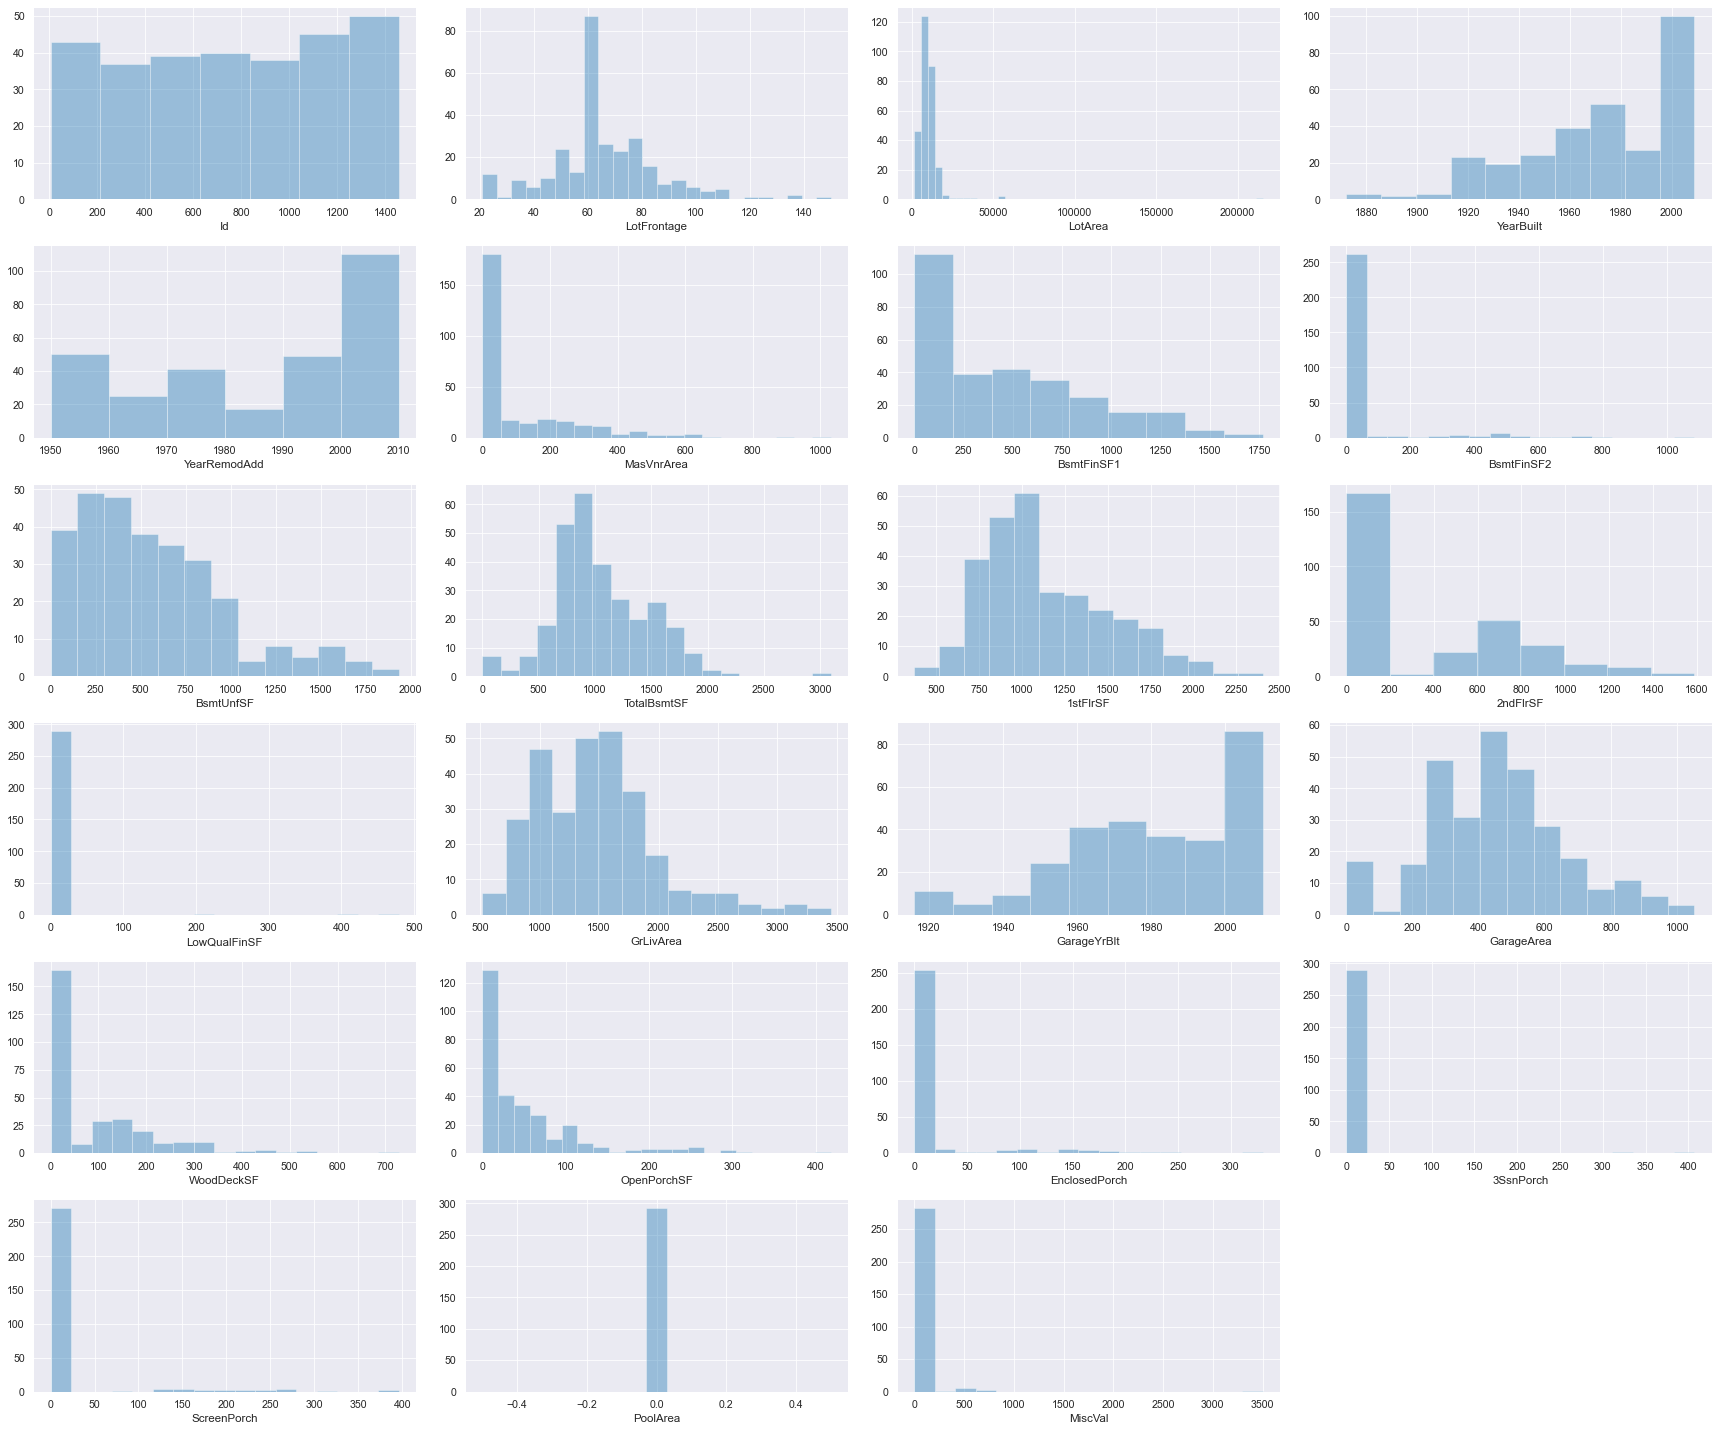

In [135]:
# Numeric features: continuous variables
sns.set_style('darkgrid')
fig = plt.figure(figsize=(24,20))
for index, col in enumerate(cont):
    plt.subplot(6,4,index+1)
    sns.distplot(df2.loc[:,col].dropna(),kde=False)
fig.tight_layout(pad=1.0)
sns.set_context('paper',font_scale=1.5)

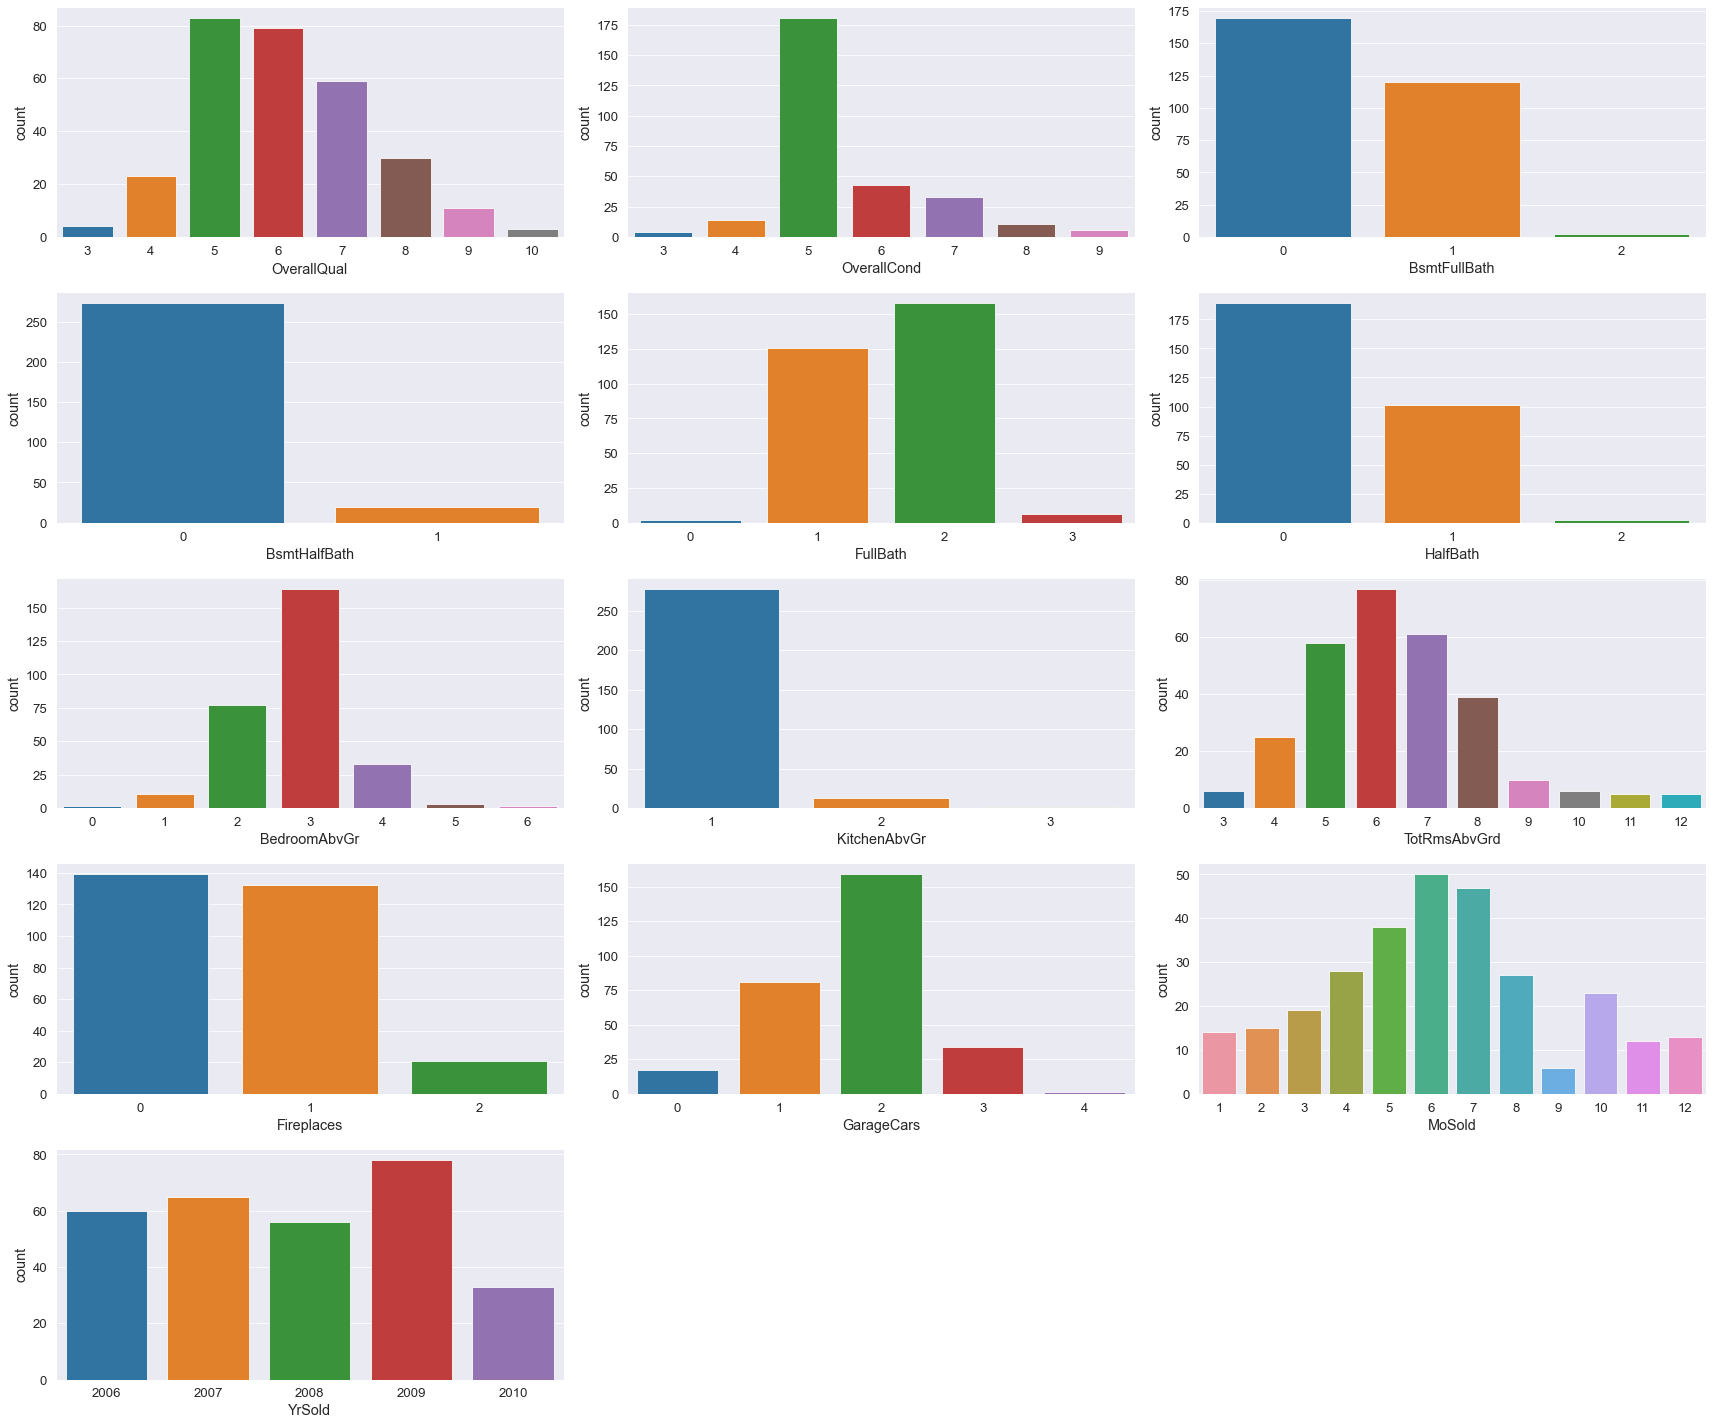

In [136]:
#Numeric features: discrete variables
sns.set_context('paper',font_scale=1.5)
fig = plt.figure(figsize=(24,20))
for index,col in enumerate(disc):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=df2)
fig.tight_layout(pad=1.0)

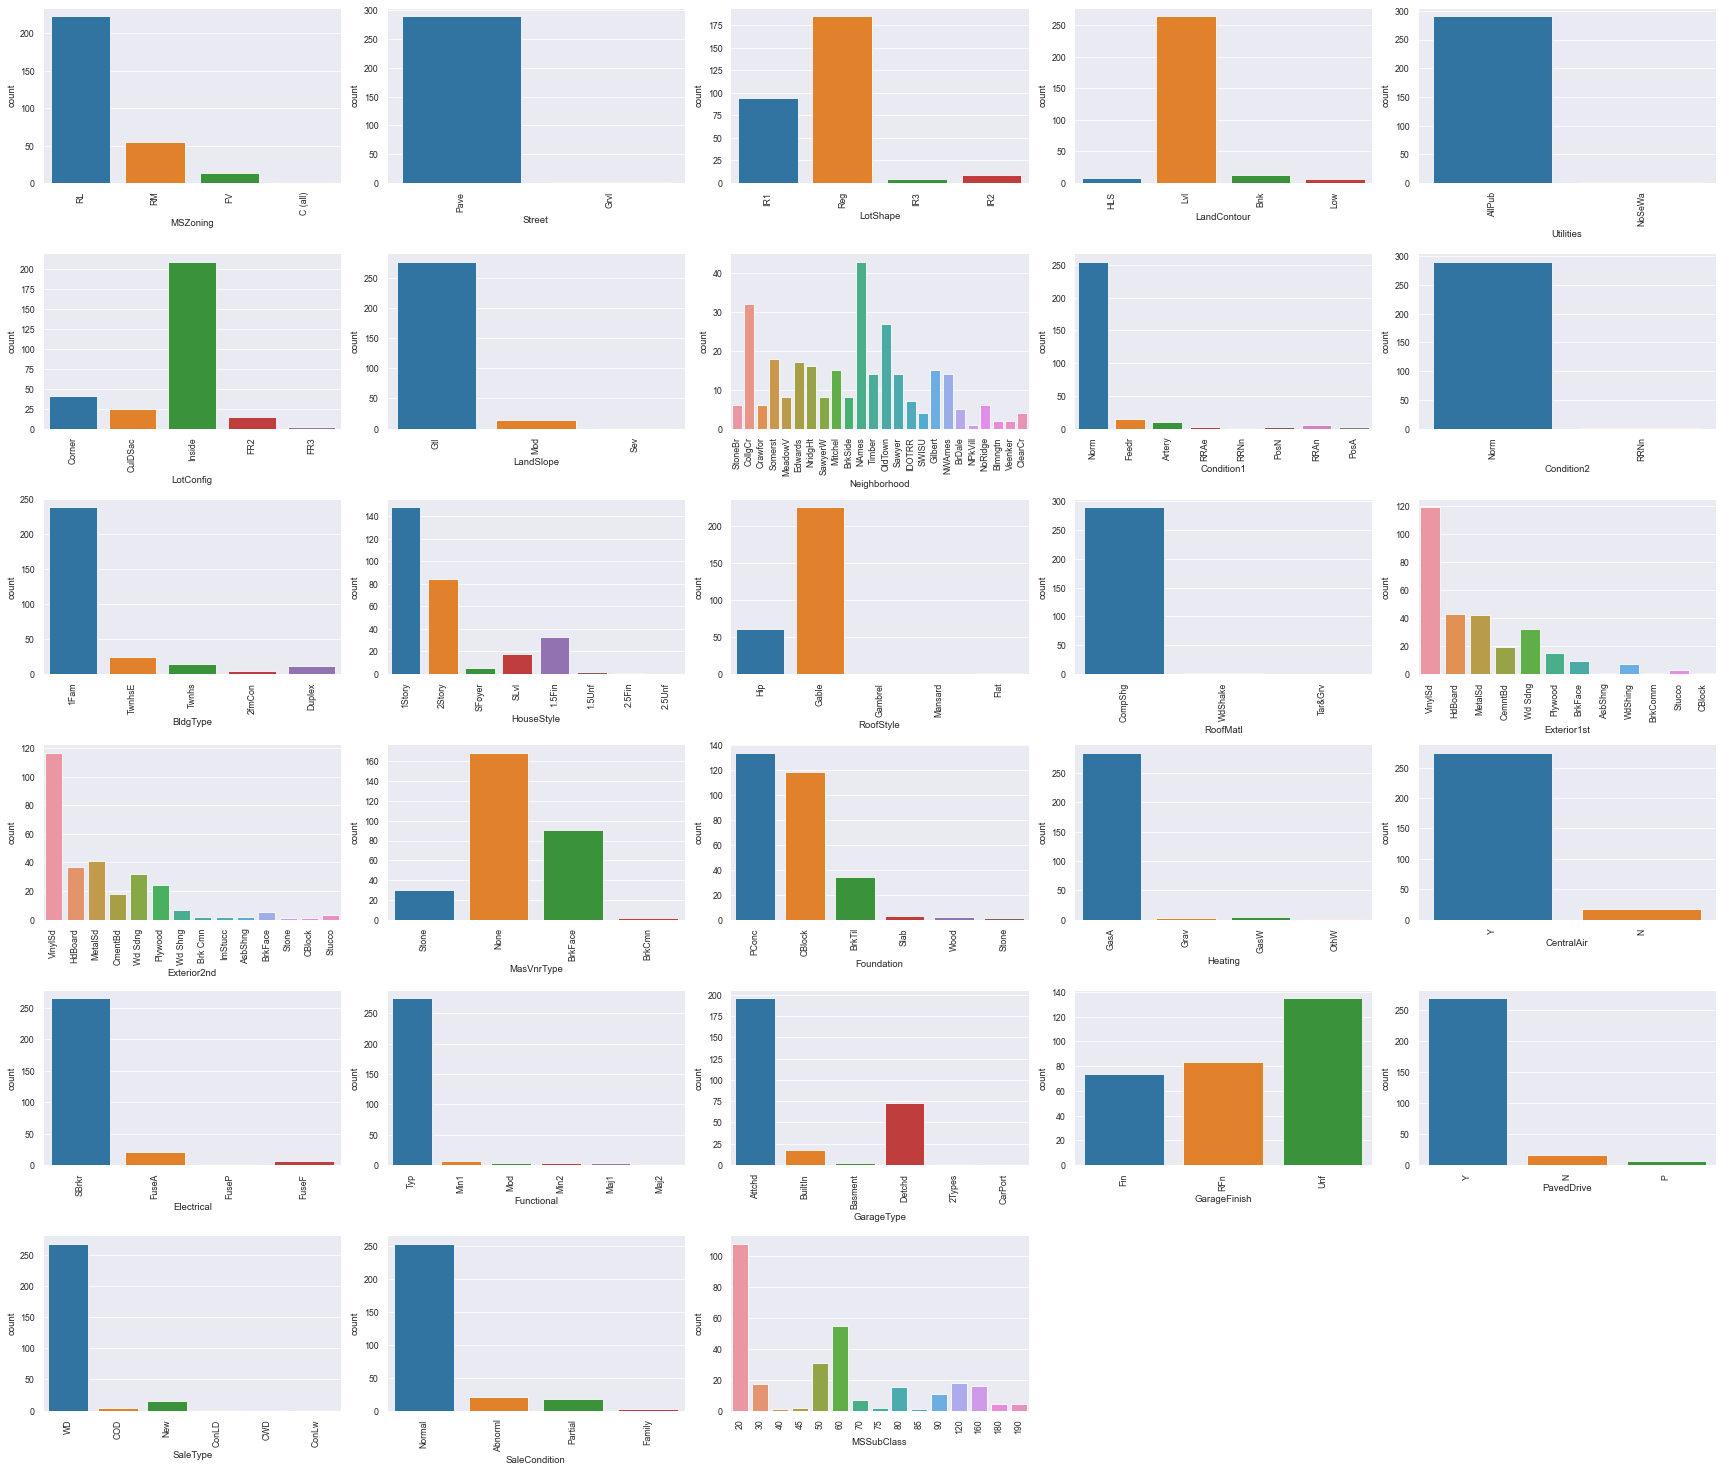

In [137]:
#Categorical features: nominal variables
sns.set_context('paper',font_scale=1)
fig = plt.figure(figsize=(24,30))
for index,col in enumerate(nomi):
    plt.subplot(9,5,index+1)
    sns.countplot(x=col, data=df2[nomi])
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

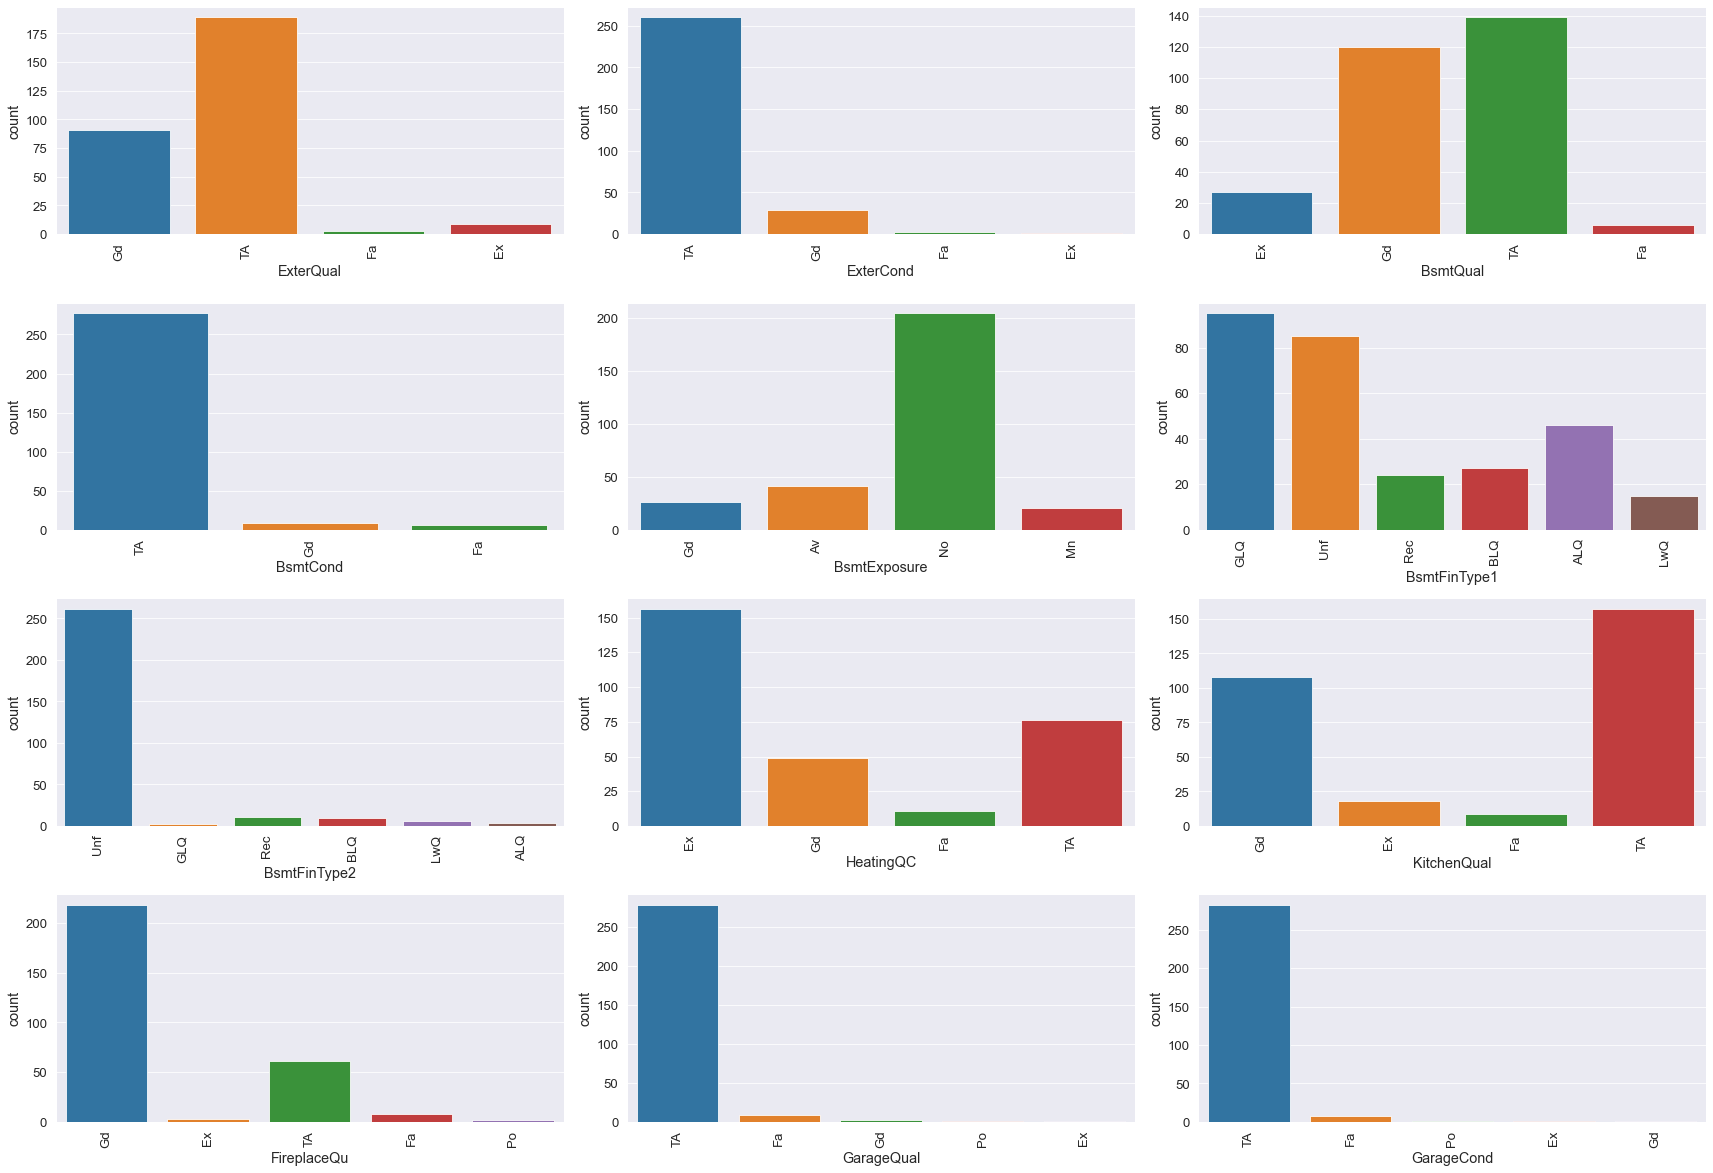

In [138]:
#Categorical features: ordinal variables
sns.set_context('paper',font_scale=1.5)
fig = plt.figure(figsize=(24,20))
for index,col in enumerate(ordi):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=df2[ordi])
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

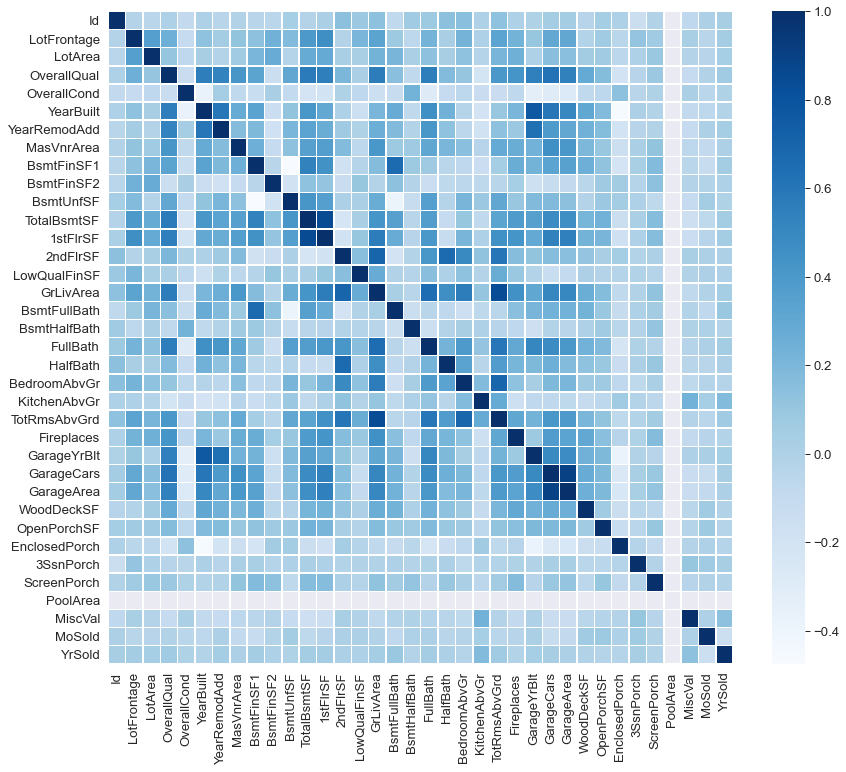

In [139]:
#Correlation matrix
# Checking for multicollinearity within numerical columns
# (keep in mind correlation and causation are different things)

plt.figure(figsize=(14,12))
num_correlation = df2[num_cols].corr()
sns.set_style('darkgrid')
sns.heatmap(num_correlation, 
            #mask = num_correlation < 0.8,
            linewidth=0.5,
            cmap='Blues');

In [140]:
corr = num_correlation.abs().unstack().drop_duplicates().sort_values(ascending=False)
corr[(corr< 1) & (corr > 0.8)]

GarageCars   GarageArea      0.902402
TotalBsmtSF  1stFlrSF        0.847542
GrLivArea    TotRmsAbvGrd    0.842067
dtype: float64

In [141]:
var_cat = df2.select_dtypes(include=[object])
var_cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      IR1         HLS    AllPub    Corner       Gtl   
1       RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
2       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      Reg         Bnk    AllPub    Inside       Gtl   
4       RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      StoneBr       Norm       Norm  ...          Gd        Typ          Gd   
1      StoneBr       Norm       Norm  ...          Gd        Typ          Ex   
2      CollgCr       Norm       Norm  ...          Ex        Typ          TA   
3      Crawfor       Norm       Norm  ...          Fa        Typ          Gd   
4      Somerst      Feedr       Norm  ...          Gd        Typ          Gd   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          Fin         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y      COD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Attchd          Unf         TA         TA          Y       WD   
4    BuiltIn          Fin         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1       Abnorml  
2        Normal  
3        Normal  
4        Normal  

[5 rows x 39 columns]

In [142]:
var_cat = var_cat.columns.tolist() #Changing categorical data into numericat
var_cat = ['LotFrontage','LotShape','Exterior1st','Exterior2nd','MasVnrType','BsmtExposure','BsmtFinType1','LotConfig']


var_cat
['LotFrontage','LotShape','Exterior1st','Exterior2nd','MasVnrType','BsmtExposure','BsmtFinType1','LotConfig']

['LotFrontage',
 'LotShape',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtExposure',
 'BsmtFinType1',
 'LotConfig']

In [143]:
from sklearn.preprocessing import LabelEncoder #Converting catagorical data into numerical with the help of Label Encoder
LE=LabelEncoder()
df2["LotConfig"]=LE.fit_transform(df2["LotConfig"])
df2["MSZoning"]=LE.fit_transform(df2["MSZoning"])
df2["SaleCondition"]=LE.fit_transform(df2["SaleCondition"])
df2["SaleType"]=LE.fit_transform(df2["SaleType"])
df2["PavedDrive"]=LE.fit_transform(df2["PavedDrive"])
df2["GarageCond"]=LE.fit_transform(df2["GarageCond"])
df2["GarageQual"]=LE.fit_transform(df2["GarageQual"])
df2["GarageFinish"]=LE.fit_transform(df2["GarageFinish"])
df2["GarageType"]=LE.fit_transform(df2["GarageType"])
df2["FireplaceQu"]=LE.fit_transform(df2["FireplaceQu"])
df2["Functional"]=LE.fit_transform(df2["Functional"])
df2["KitchenQual"]=LE.fit_transform(df2["KitchenQual"])
df2["Condition2"]=LE.fit_transform(df2["Condition2"])
df2["HeatingQC"]=LE.fit_transform(df2["HeatingQC"])
df2["CentralAir"]=LE.fit_transform(df2["CentralAir"])
df2["Electrical"]=LE.fit_transform(df2["Electrical"])
df2["BsmtFinType2"]=LE.fit_transform(df2["BsmtFinType2"])
df2["BsmtFinType1"]=LE.fit_transform(df2["BsmtFinType1"])
df2["ExterCond"]=LE.fit_transform(df2["ExterCond"])
df2["Foundation"]=LE.fit_transform(df2["Foundation"])
df2["BsmtQual"]=LE.fit_transform(df2["BsmtQual"])
df2["BsmtCond"]=LE.fit_transform(df2["BsmtCond"])
df2["LandContour"]=LE.fit_transform(df2["LandContour"])
df2["RoofMatl"]=LE.fit_transform(df2["RoofMatl"])

df2["LandSlope"]=LE.fit_transform(df2["LandSlope"])
df2["Neighborhood"]=LE.fit_transform(df2["Neighborhood"])
df2["Condition1"]=LE.fit_transform(df2["Condition1"])
df2["BldgType"]=LE.fit_transform(df2["BldgType"])
df2["HouseStyle"]=LE.fit_transform(df2["HouseStyle"])
df2["RoofStyle"]=LE.fit_transform(df2["RoofStyle"])

df2["ExterQual"]=LE.fit_transform(df2["ExterQual"])
df2["LotShape"]=LE.fit_transform(df2["LotShape"])
df2["LotFrontage"]=LE.fit_transform(df2["LotFrontage"])
df2["Exterior1st"]=LE.fit_transform(df2["Exterior1st"])
df2["Exterior2nd"]=LE.fit_transform(df2["Exterior2nd"])
df2["MasVnrType"]=LE.fit_transform(df2["MasVnrType"])
df2["BsmtExposure"]=LE.fit_transform(df2["BsmtExposure"])
df2["Heating"]=LE.fit_transform(df2["Heating"])

In [144]:
df2= df2.drop(['Utilities', 'Street',], axis=1)

Id                 AxesSubplot(0.125,0.787927;0.0596154x0.0920732)
MSSubClass       AxesSubplot(0.196538,0.787927;0.0596154x0.0920...
MSZoning         AxesSubplot(0.268077,0.787927;0.0596154x0.0920...
LotFrontage      AxesSubplot(0.339615,0.787927;0.0596154x0.0920...
LotArea          AxesSubplot(0.411154,0.787927;0.0596154x0.0920...
LotShape         AxesSubplot(0.482692,0.787927;0.0596154x0.0920...
LandContour      AxesSubplot(0.554231,0.787927;0.0596154x0.0920...
LotConfig        AxesSubplot(0.625769,0.787927;0.0596154x0.0920...
LandSlope        AxesSubplot(0.697308,0.787927;0.0596154x0.0920...
Neighborhood     AxesSubplot(0.768846,0.787927;0.0596154x0.0920...
Condition1       AxesSubplot(0.840385,0.787927;0.0596154x0.0920...
Condition2         AxesSubplot(0.125,0.677439;0.0596154x0.0920732)
BldgType         AxesSubplot(0.196538,0.677439;0.0596154x0.0920...
HouseStyle       AxesSubplot(0.268077,0.677439;0.0596154x0.0920...
OverallQual      AxesSubplot(0.339615,0.677439;0.0596154x0.092

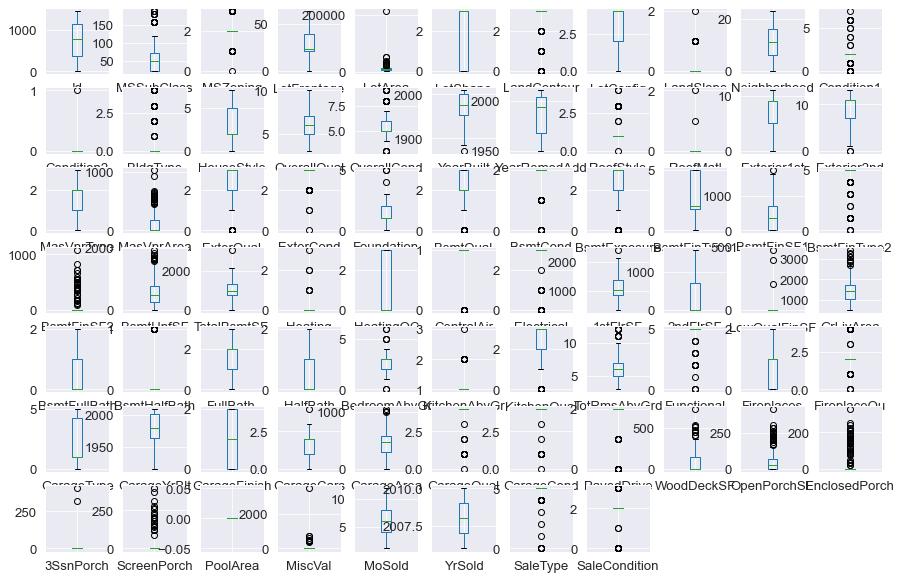

In [145]:
#Plotting boxplots to check outlier
df2.plot(kind='box',subplots=True, layout=(7,11), figsize= (15,10))

In [146]:
df2.skew() #checking skewness

Id               -0.108806
MSSubClass        1.358597
MSZoning          0.187174
LotFrontage       0.218308
LotArea          12.781805
LotShape         -0.639195
LandContour      -3.332422
LotConfig        -1.204667
LandSlope         4.639043
Neighborhood      0.046894
Condition1        2.808950
Condition2       17.088007
BldgType          1.997202
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle         1.386333
RoofMatl         13.717569
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        1.976804
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1        0.739790
BsmtFinType2     -3.702330
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
Heating           8.212666
H

In [147]:
from sklearn.preprocessing import power_transform #Removing Skewness
df2_new=power_transform(df2)
df2_new=pd.DataFrame(df2_new,columns=df2.columns)

In [148]:
from sklearn.preprocessing import StandardScaler #Scalling dataset
sc=StandardScaler()
x=sc.fit_transform(df2)
x

array([[-0.94827766, -0.85605433, -0.28700579, ..., -0.65090813,
         0.23029007,  0.14865423],
       [ 0.59312021,  1.43198105, -0.28700579, ...,  0.86355541,
        -6.49418003, -3.32390858],
       [ 0.39167468, -0.85605433, -0.28700579, ...,  0.86355541,
         0.23029007,  0.14865423],
       ...,
       [-1.67257621, -0.85605433, -0.28700579, ...,  1.62078718,
         0.23029007,  0.14865423],
       [-0.52727912, -0.16964372,  1.80813647, ..., -1.4081399 ,
         0.23029007,  0.14865423],
       [ 1.41021953,  2.3471952 ,  1.80813647, ..., -1.4081399 ,
         0.23029007,  0.14865423]])

In [149]:
loaded_model=pickle.load(open('housing_price.pkl','rb'))
result=loaded_model.score(x_train,y_train)
print(result)

0.9811733340663231


In [150]:
conclusion=pd.DataFrame([loaded_model.predict(df2)[:],pred_decision[:]],index=["predicted","orginal"])

In [151]:
conclusion

0          1          2          3          4          5    \
predicted  12.631539  12.618312  12.652533  12.596043  12.656198  12.657985   
orginal    12.408061  12.143344  12.788059  11.808875  12.864864  11.392386   

                 6          7          8          9    ...        282  \
predicted  12.598402  12.611220  12.621983  12.607294  ...  12.608427   
orginal    11.596914  12.366544  11.818269  11.721514  ...        NaN   

                 283        284        285        286        287        288  \
predicted  12.610462  12.623059  12.611926  12.609742  12.629391  12.612705   
orginal          NaN        NaN        NaN        NaN        NaN        NaN   

                 289        290        291  
predicted  12.605029  12.605548  12.668964  
orginal          NaN        NaN        NaN  

[2 rows x 292 columns]